<a href="https://colab.research.google.com/github/ydad69/Healthcare-Resource-Demand-Prediction-and-Patient-Segmentation/blob/main/Patient_Health_Outcome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV




from sklearn import preprocessing
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFE


In [ ]:
data_path = 'healthcare_dataset.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset and its summary information
df.head(50)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [ ]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [ ]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [ ]:
df.shape

(10000, 15)

In [ ]:
print(df['Billing Amount'].max())
print(df['Billing Amount'].min())

49995.90228322116
1000.1808370217516


In [ ]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# Use pd.cut to bin the values
df['Billing Class'] = pd.cut(df['Billing Amount'], bins=bins, labels=labels)
df['Billing Class'] = df['Billing Class'].astype(int)
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Billing Class
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,8
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,10
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,8
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,5
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,4
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal,5
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal,8
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal,3
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal,5
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
 15  Billing Class       10000 non-null  int64  
dtypes: fl

In [ ]:
df.describe()

,Age,Billing Amount,Room Number,Billing Class
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000,5.593400
std,19.588974,14067.292709,115.806027,2.814119
min,18.000000,1000.180837,101.000000,1.000000
25%,35.000000,13506.523967,199.000000,3.000000
50%,52.000000,25258.112566,299.000000,6.000000
75%,68.000000,37733.913727,400.000000,8.000000
max,85.000000,49995.902283,500.000000,10.000000


In [ ]:
df.value_counts('Billing Class')

Billing Class
4     1099
5     1048
10    1043
6     1039
8     1012
3     1011
9      987
2      981
7      980
1      800
Name: count, dtype: int64

In [ ]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Calculate length of stay in days
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

<function matplotlib.pyplot.show(close=None, block=None)>

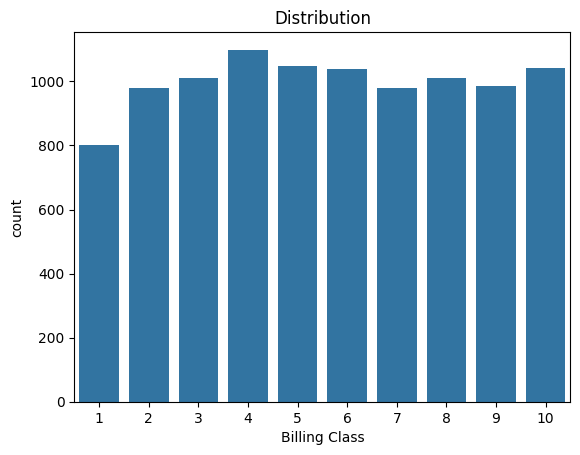

In [ ]:
sns.countplot(x="Billing Class", data=df)
plt.title("Distribution")
plt.show

<Axes: xlabel='Gender', ylabel='count'>

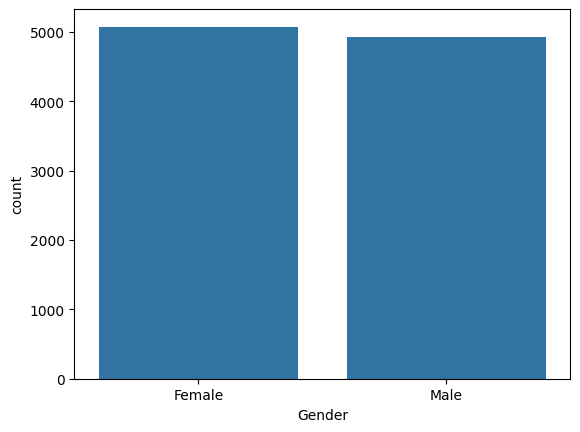

In [ ]:
sns.countplot(data=df,x='Gender')

<ipython-input-77-8b901d1b8c38>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Medical Condition',palette='husl')


<Axes: xlabel='Medical Condition', ylabel='count'>

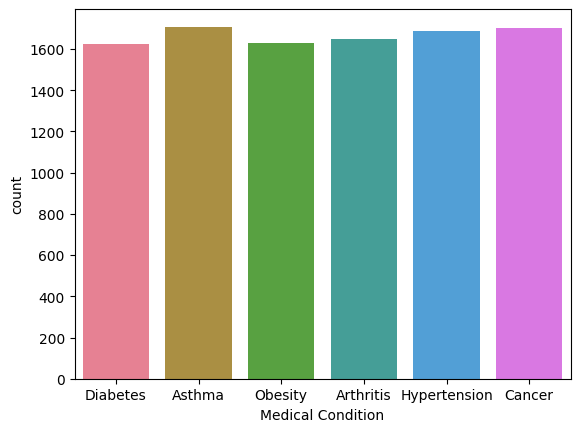

In [ ]:
sns.countplot(data=df,x='Medical Condition',palette='husl')

<Axes: xlabel='Admission Type', ylabel='count'>

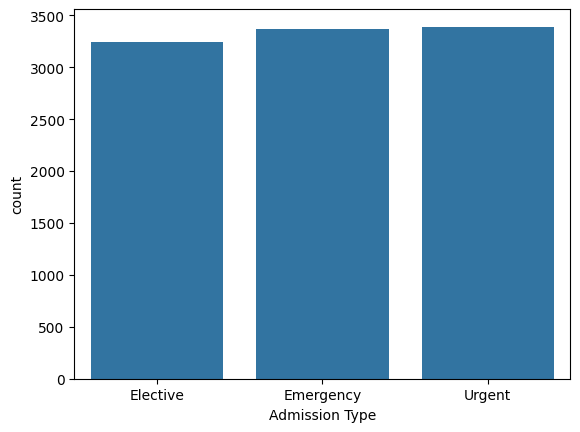

In [ ]:
sns.countplot(data=df,x='Admission Type')

<ipython-input-79-47f362e4363e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Blood Type',palette='muted')


<Axes: xlabel='Blood Type', ylabel='count'>

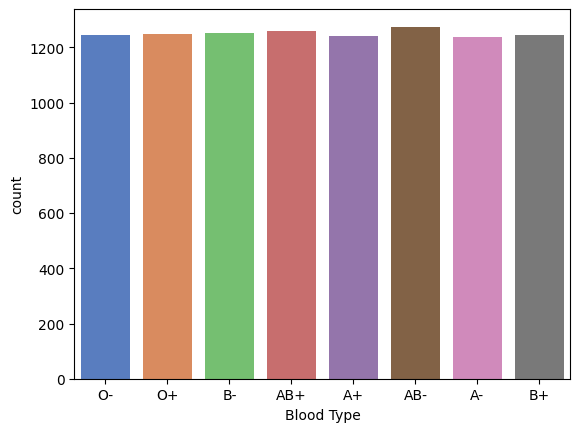

In [ ]:
sns.countplot(data=df,x='Blood Type',palette='muted')

<ipython-input-80-384e68a8db62>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Medication',palette='hls')


<Axes: xlabel='Medication', ylabel='count'>

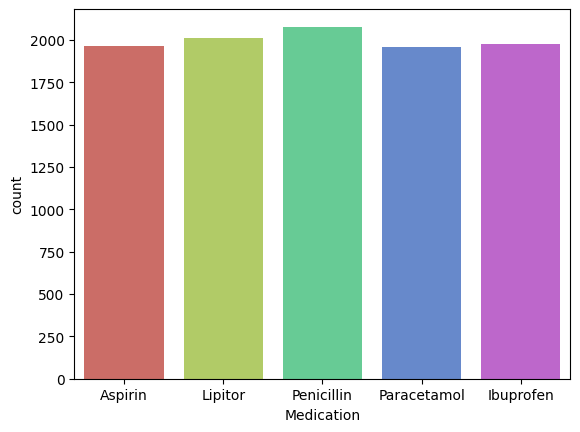

In [ ]:
sns.countplot(data=df,x='Medication',palette='hls')

<ipython-input-81-31badcbc57ab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=age_ranges,data=df,palette='plasma')


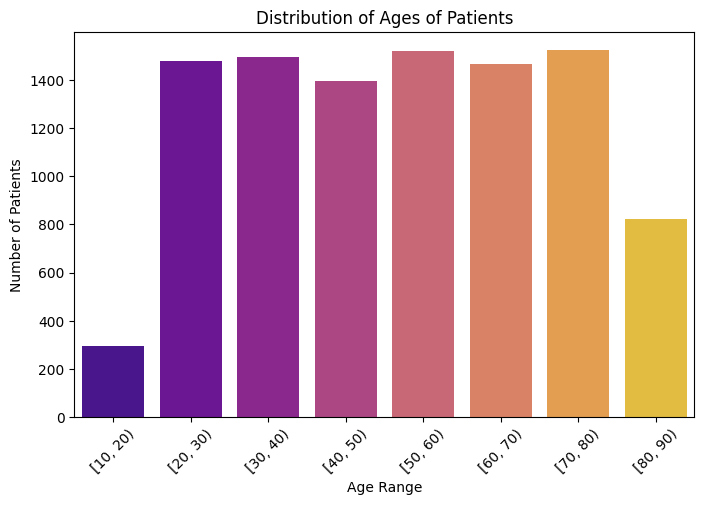

In [ ]:
age_ranges = pd.cut(df['Age'], bins=range(10, 100, 10), right=False)
plt.figure(figsize=(8,5))
sns.countplot(x=age_ranges,data=df,palette='plasma')
plt.title('Distribution of Ages of Patients')
plt.xlabel('Age Range')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

In [ ]:
gender_medical = df.groupby(['Medical Condition','Gender']).size().sort_values().unstack()
gender_medical

Gender,Female,Male
Medical Condition,,
Arthritis,815,835
Asthma,874,834
Cancer,887,816
Diabetes,825,798
Hypertension,836,852
Obesity,838,790


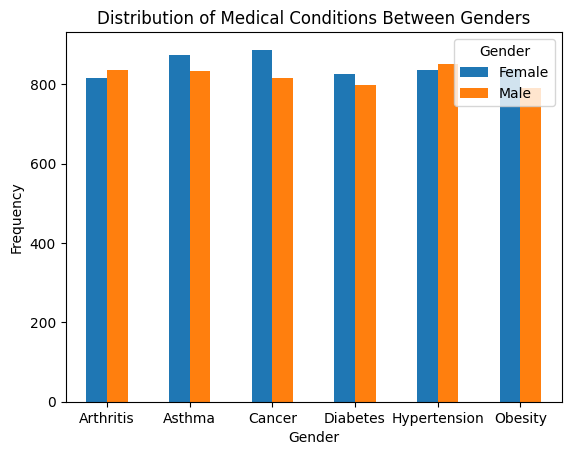

In [ ]:
gender_medical.plot(kind = 'bar')
plt.title('Distribution of Medical Conditions Between Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

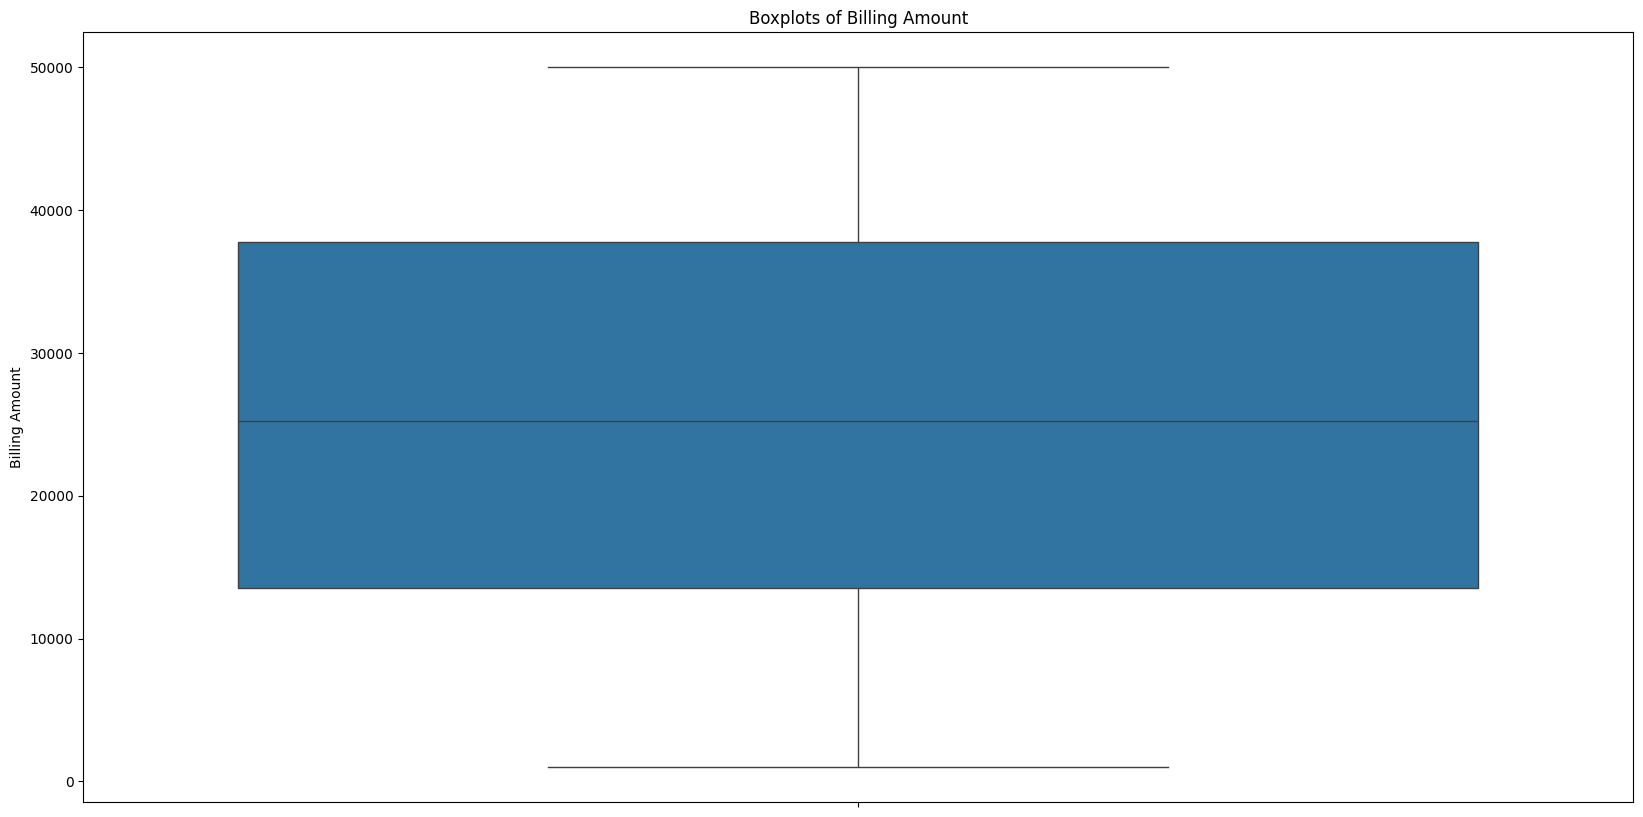

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df['Billing Amount'])
plt.title('Boxplots of Billing Amount')
plt.show()

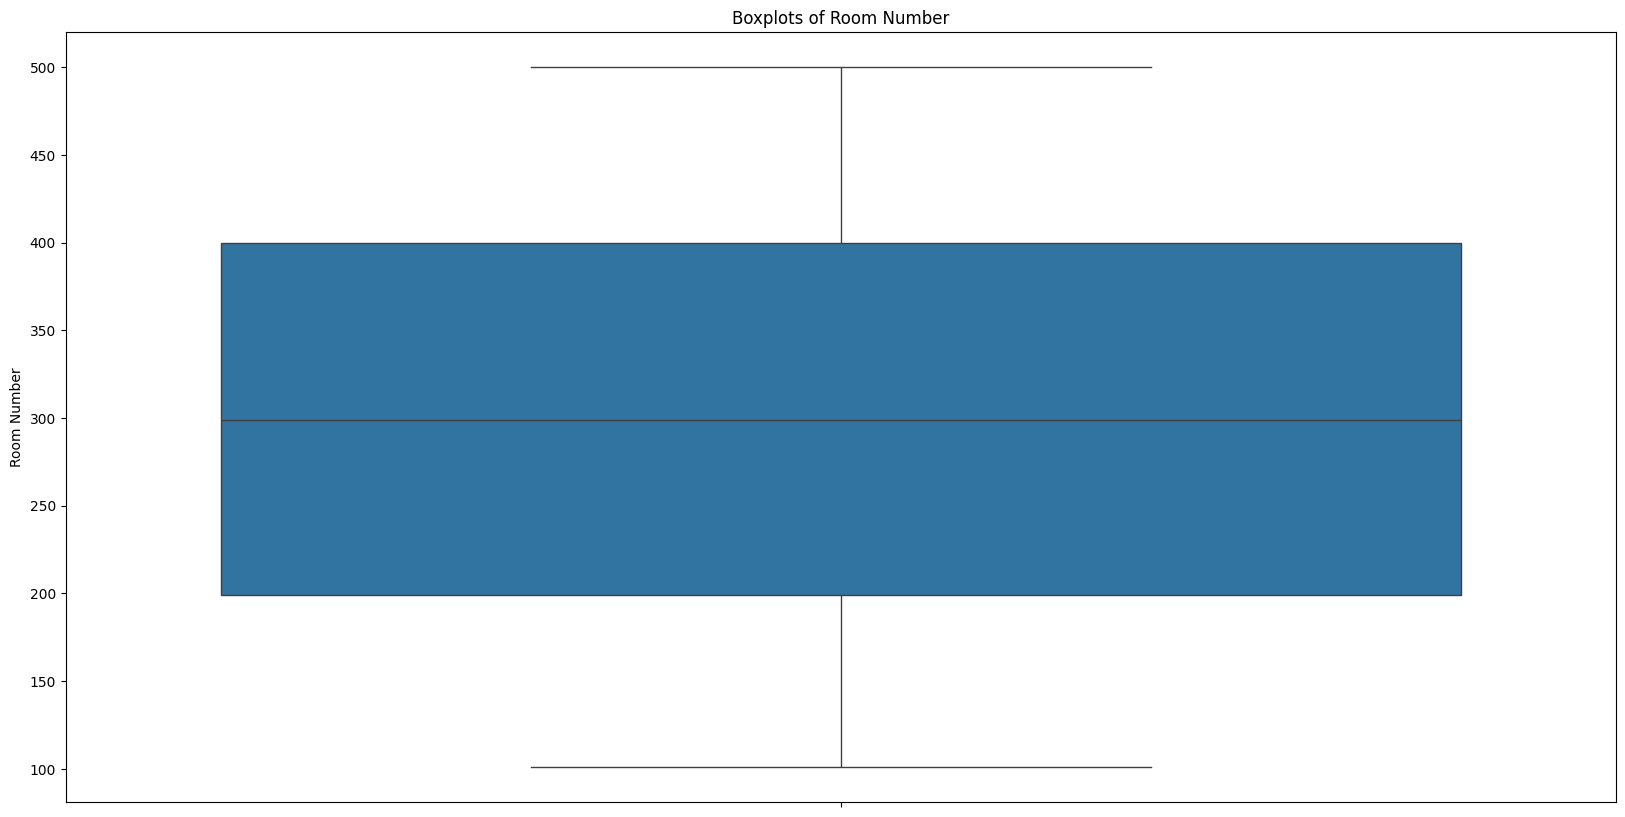

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df['Room Number'])
plt.title('Boxplots of Room Number')
plt.show()

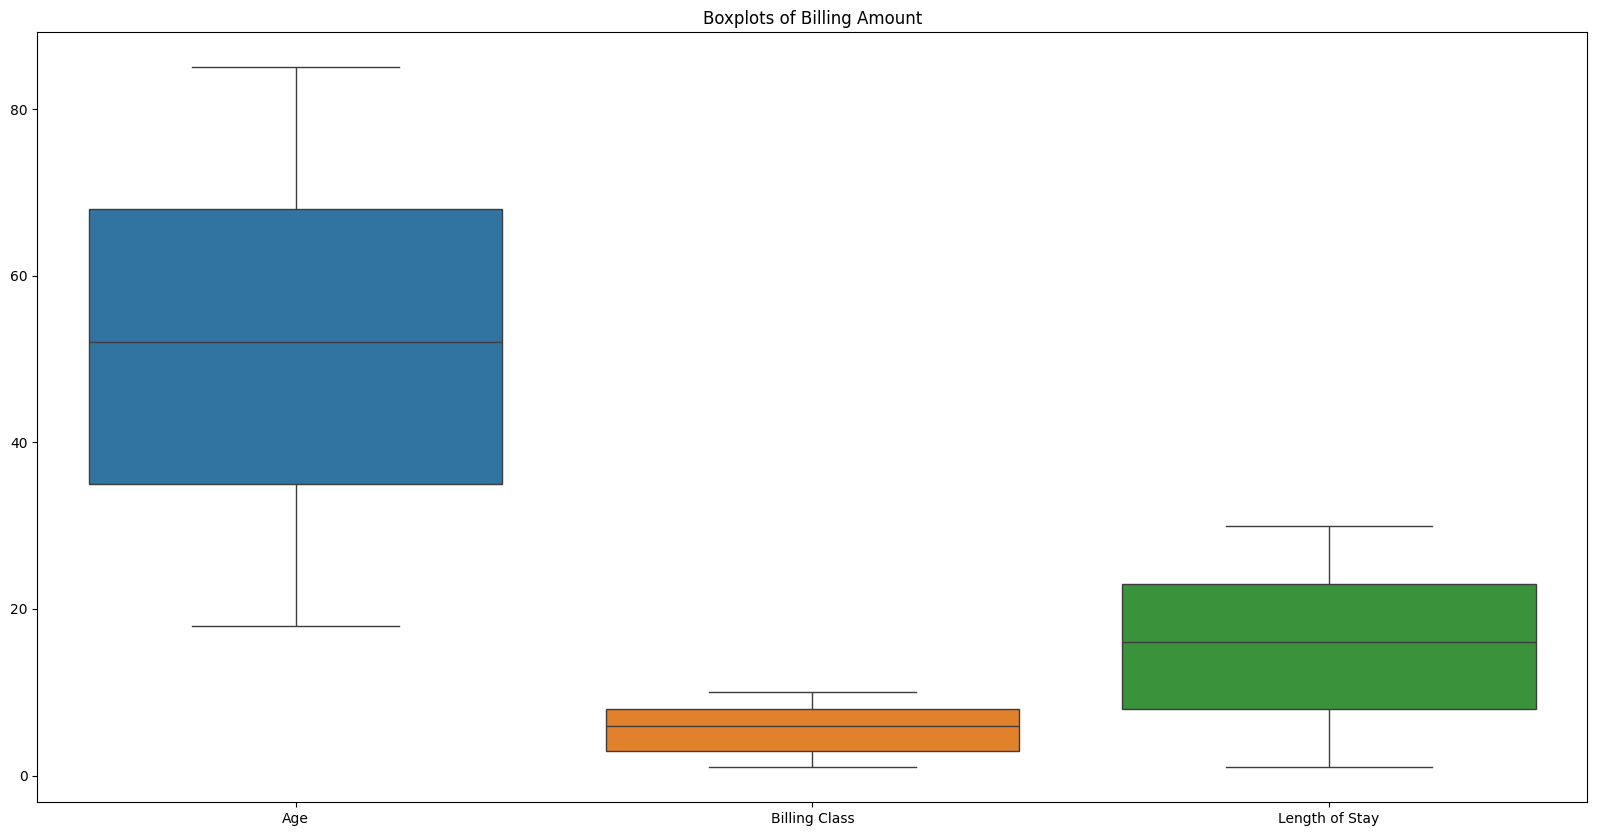

In [ ]:
plt.figure(figsize=(20,10))
columns_ = ['Billing Amount', 'Room Number']
sns.boxplot(data=df.drop(columns=columns_, axis=1))
plt.title('Boxplots of Billing Amount')
plt.show()

In [ ]:
columns_to_drop = ['Name','Doctor', 'Hospital', 'Insurance Provider','Room Number','Date of Admission','Discharge Date']
df = df.drop(columns=columns_to_drop, axis=1)

df.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Test Results,Billing Class,Length of Stay
0,81,Female,O-,Diabetes,37490.983364,Elective,Aspirin,Inconclusive,8,14
1,35,Male,O+,Asthma,47304.064845,Emergency,Lipitor,Normal,10,14
2,61,Male,B-,Obesity,36874.896997,Emergency,Lipitor,Normal,8,30
3,49,Male,B-,Asthma,23303.322092,Urgent,Penicillin,Abnormal,5,1
4,51,Male,O-,Arthritis,18086.344184,Urgent,Paracetamol,Normal,4,24


In [ ]:
cat_data=df.select_dtypes(include='object')
num_data=df.select_dtypes(exclude='object')
print("categorical features: ", cat_data.columns.to_list())
print("numerical features: ", num_data.columns.to_list())

categorical features:  ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']
numerical features:  ['Age', 'Billing Amount', 'Billing Class', 'Length of Stay']


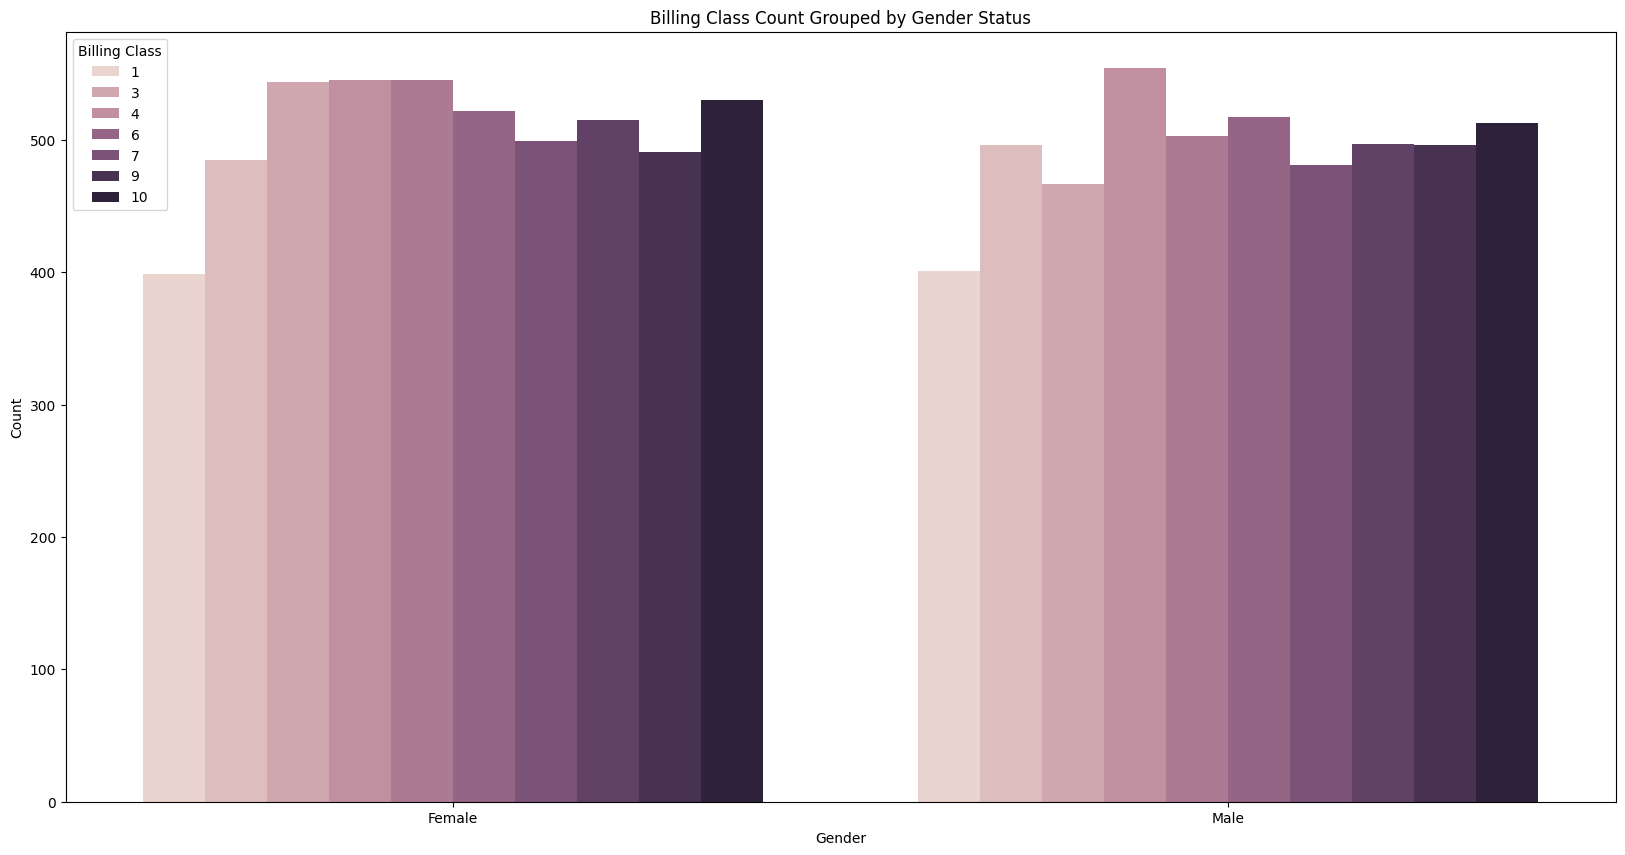

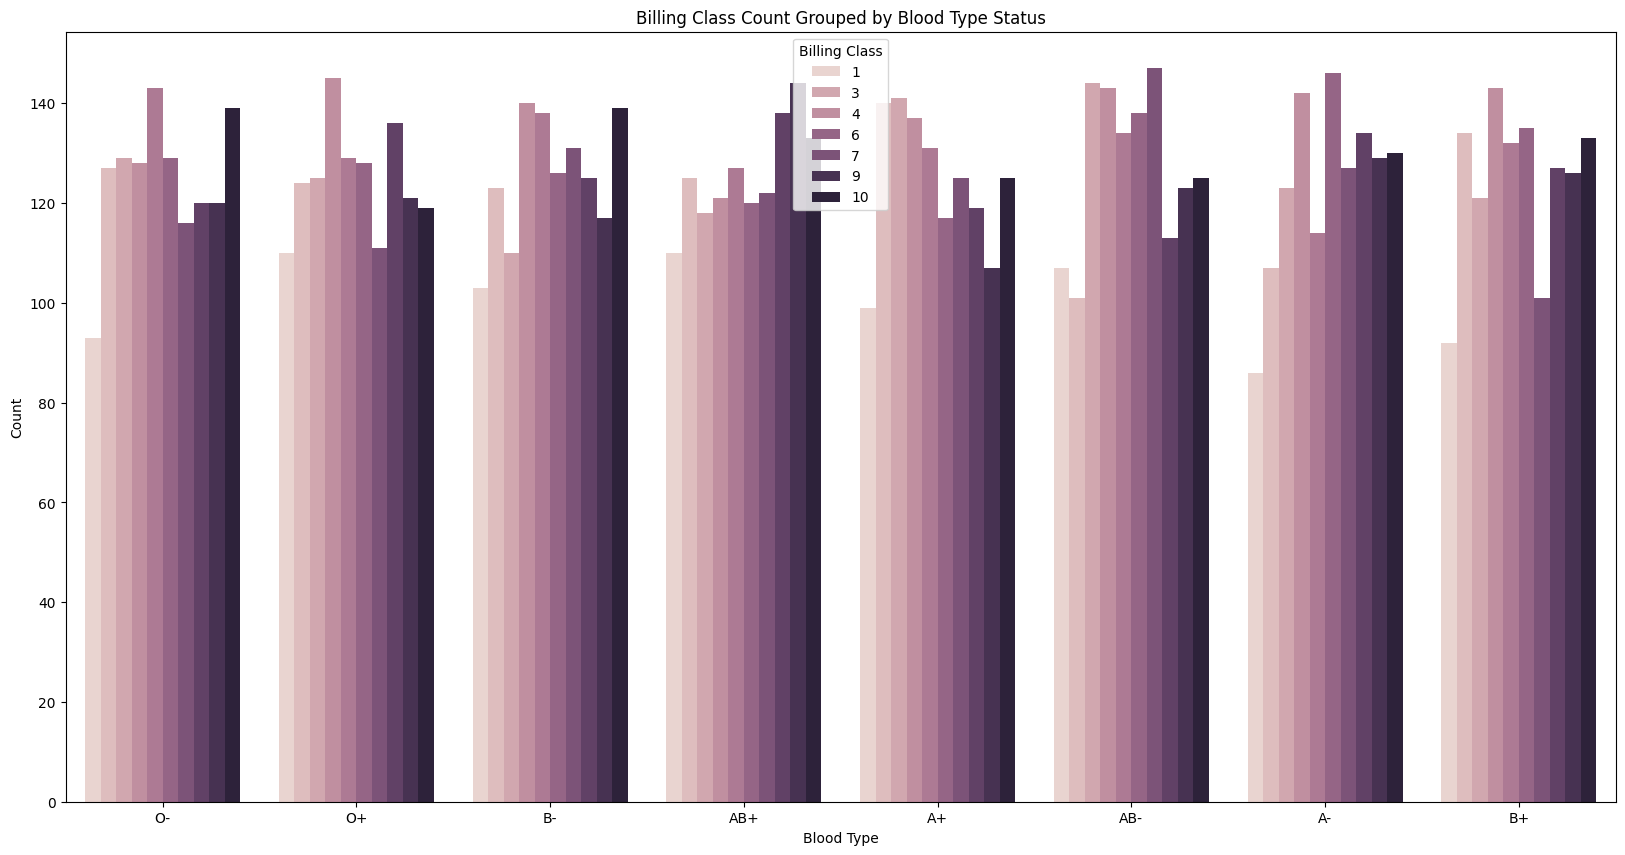

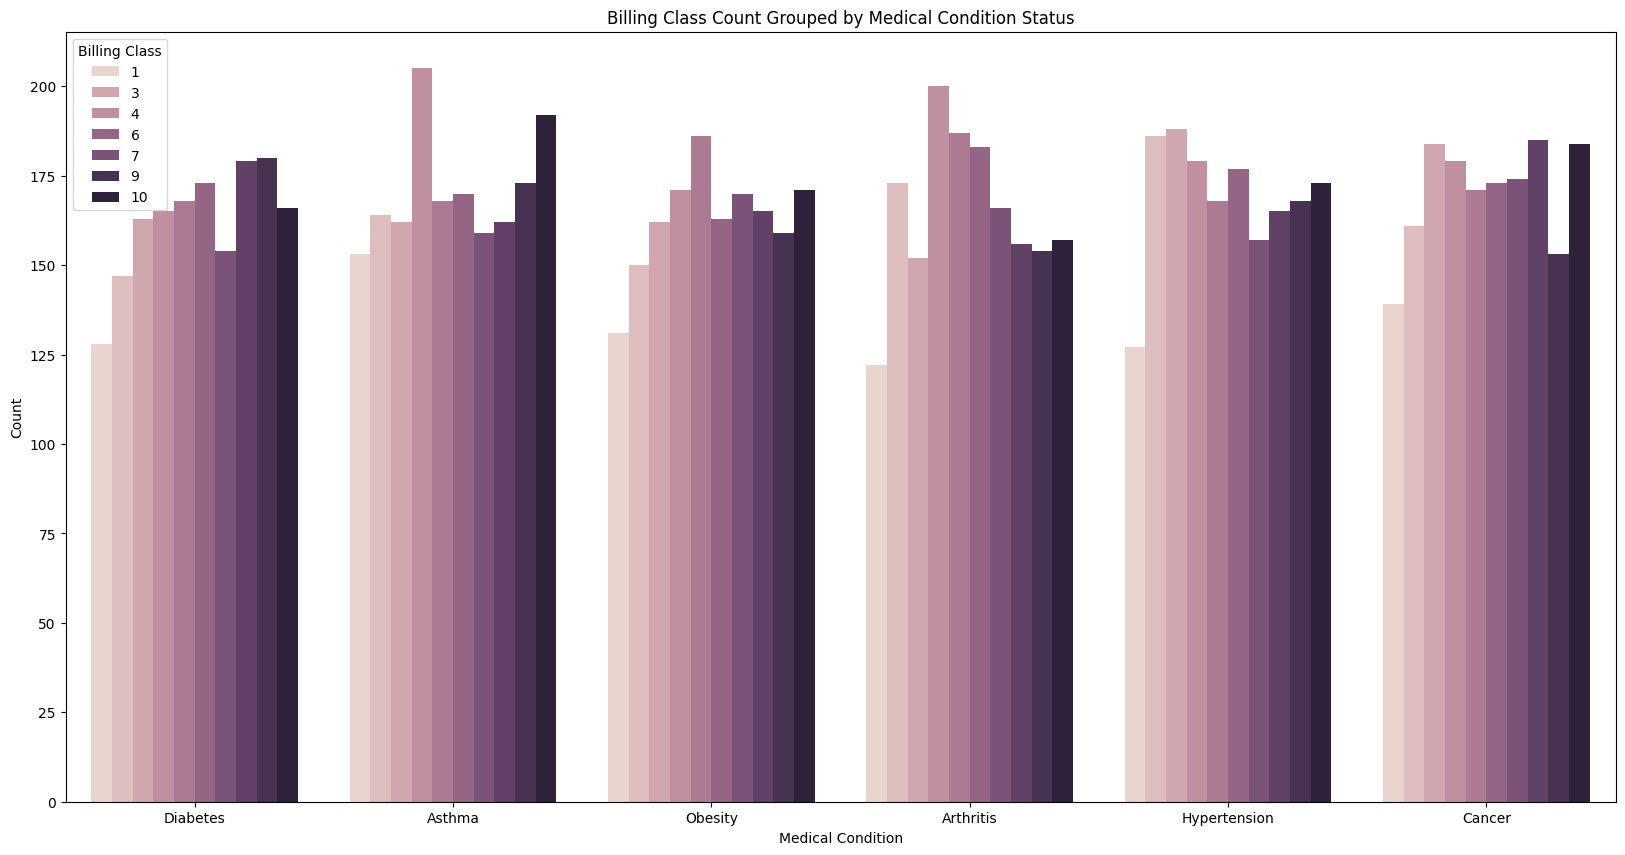

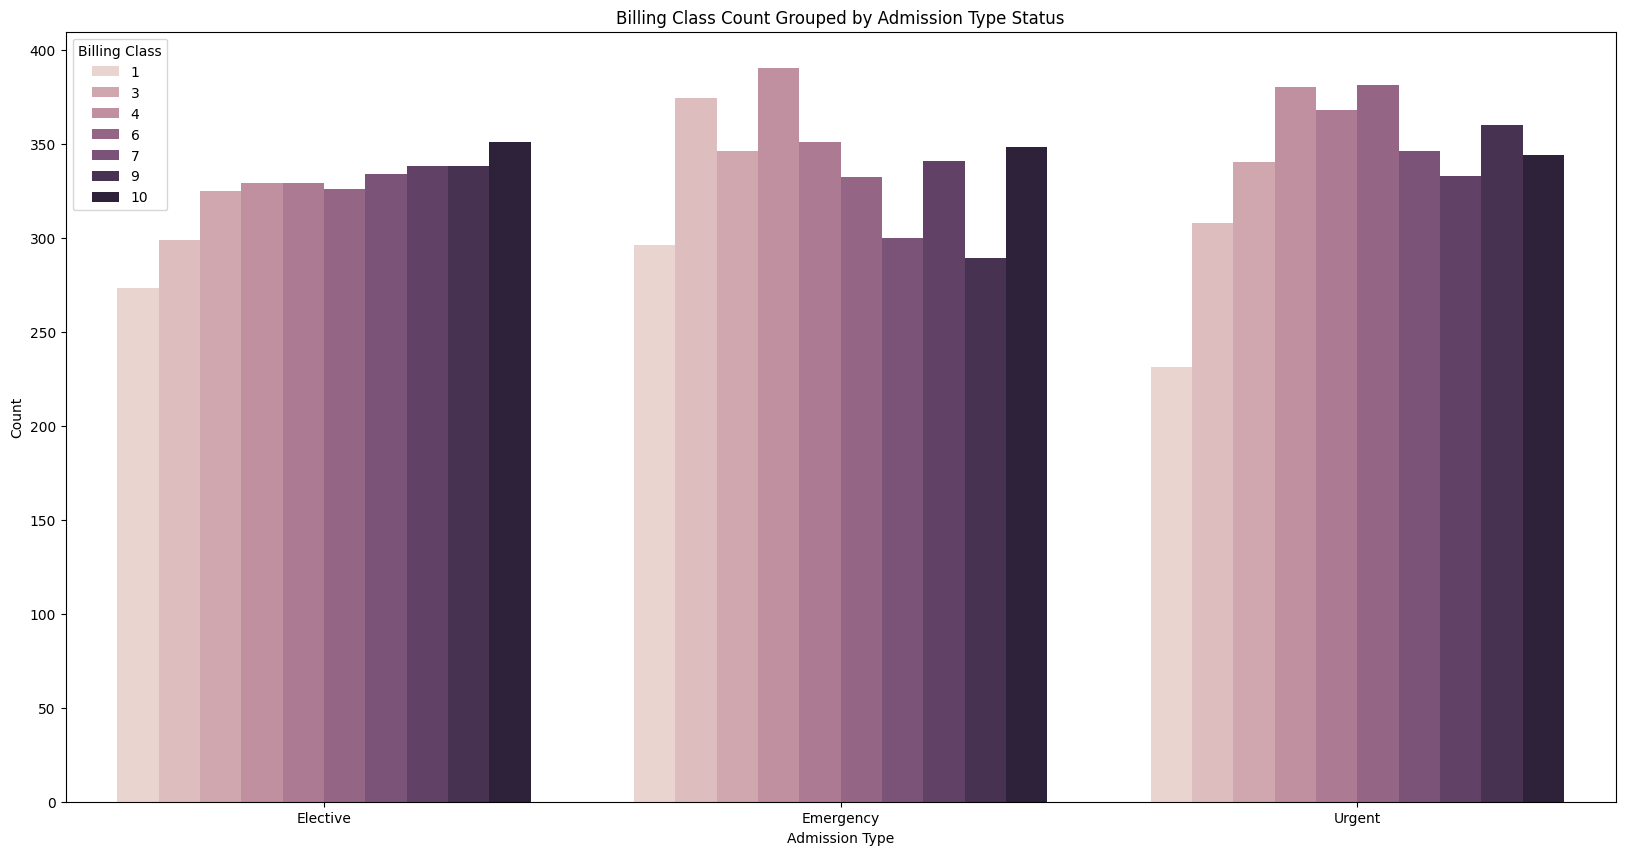

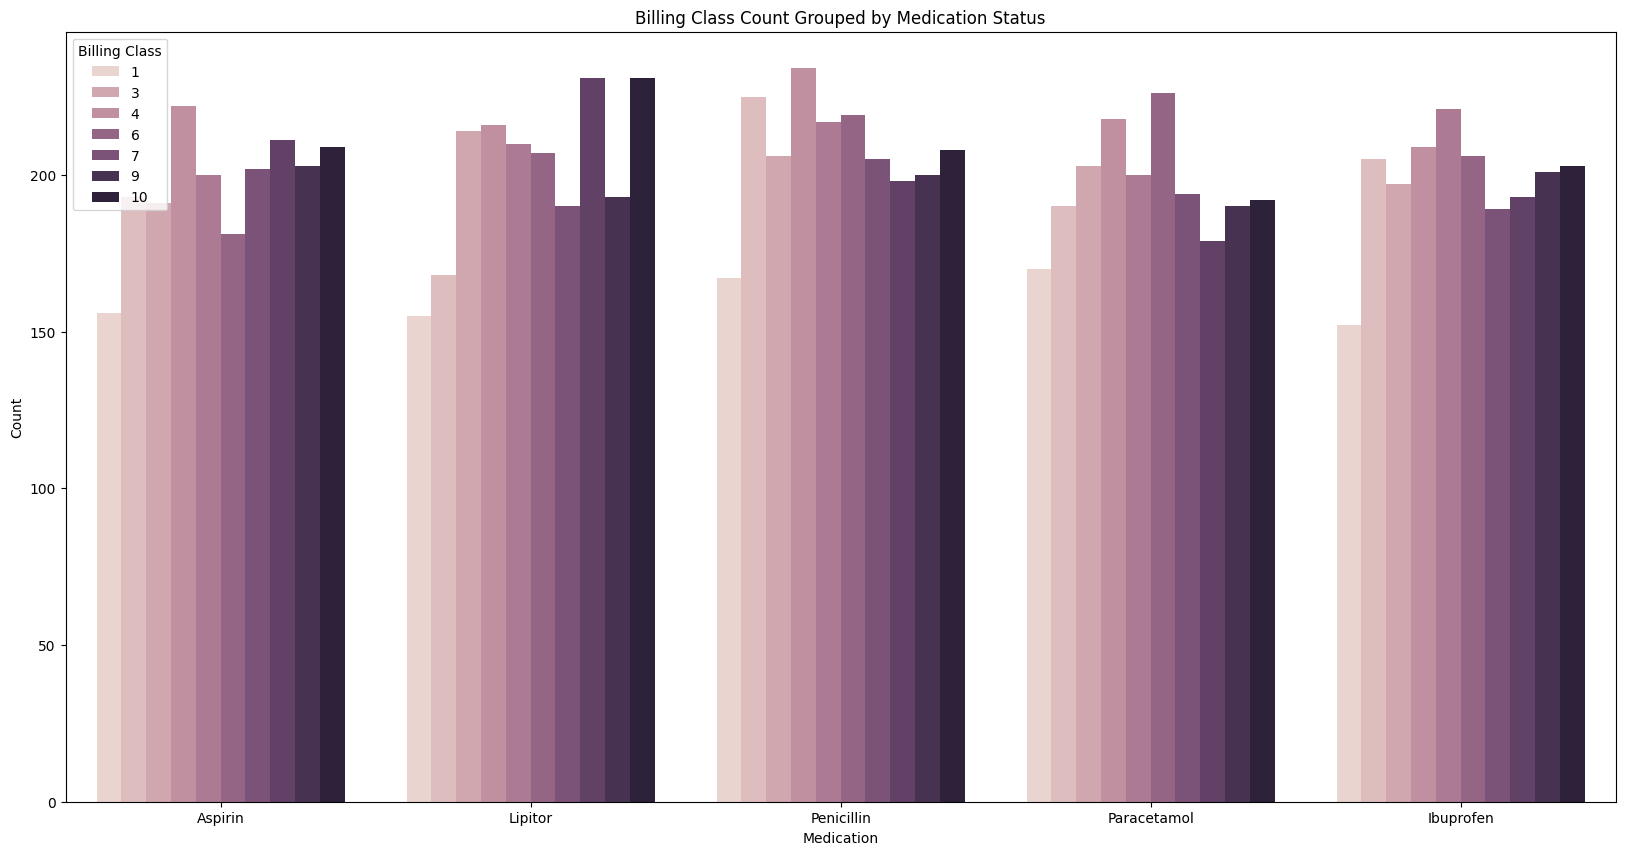

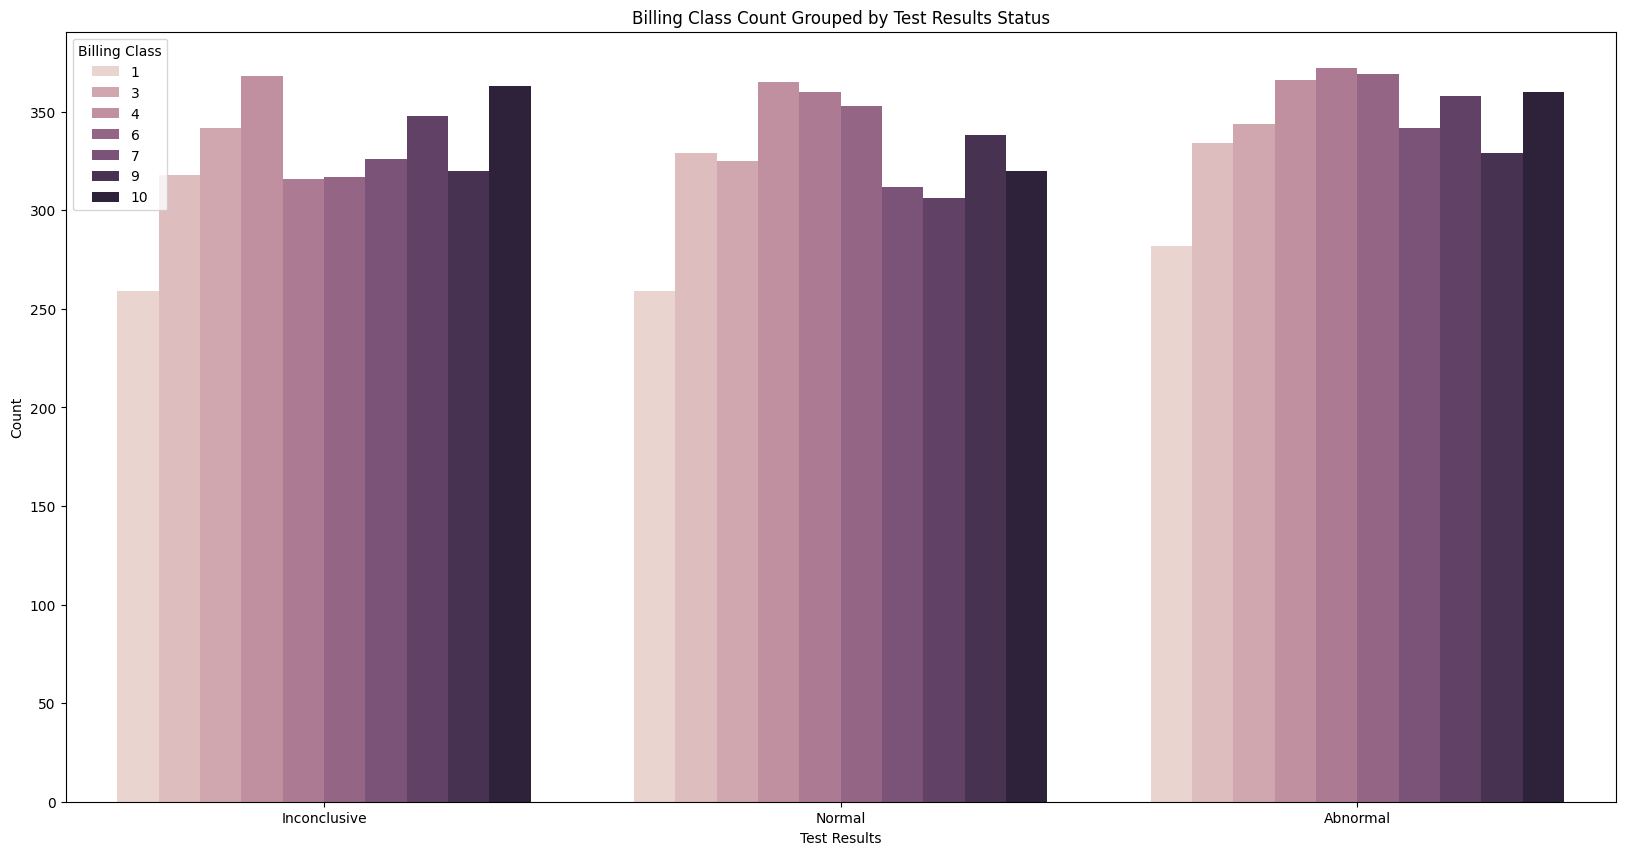

In [ ]:
for c in cat_data:
    plt.figure(figsize=(20,10))
    sns.countplot(x=c, hue='Billing Class', data=df)
    plt.title(f'Billing Class Count Grouped by {c} Status')
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.show()

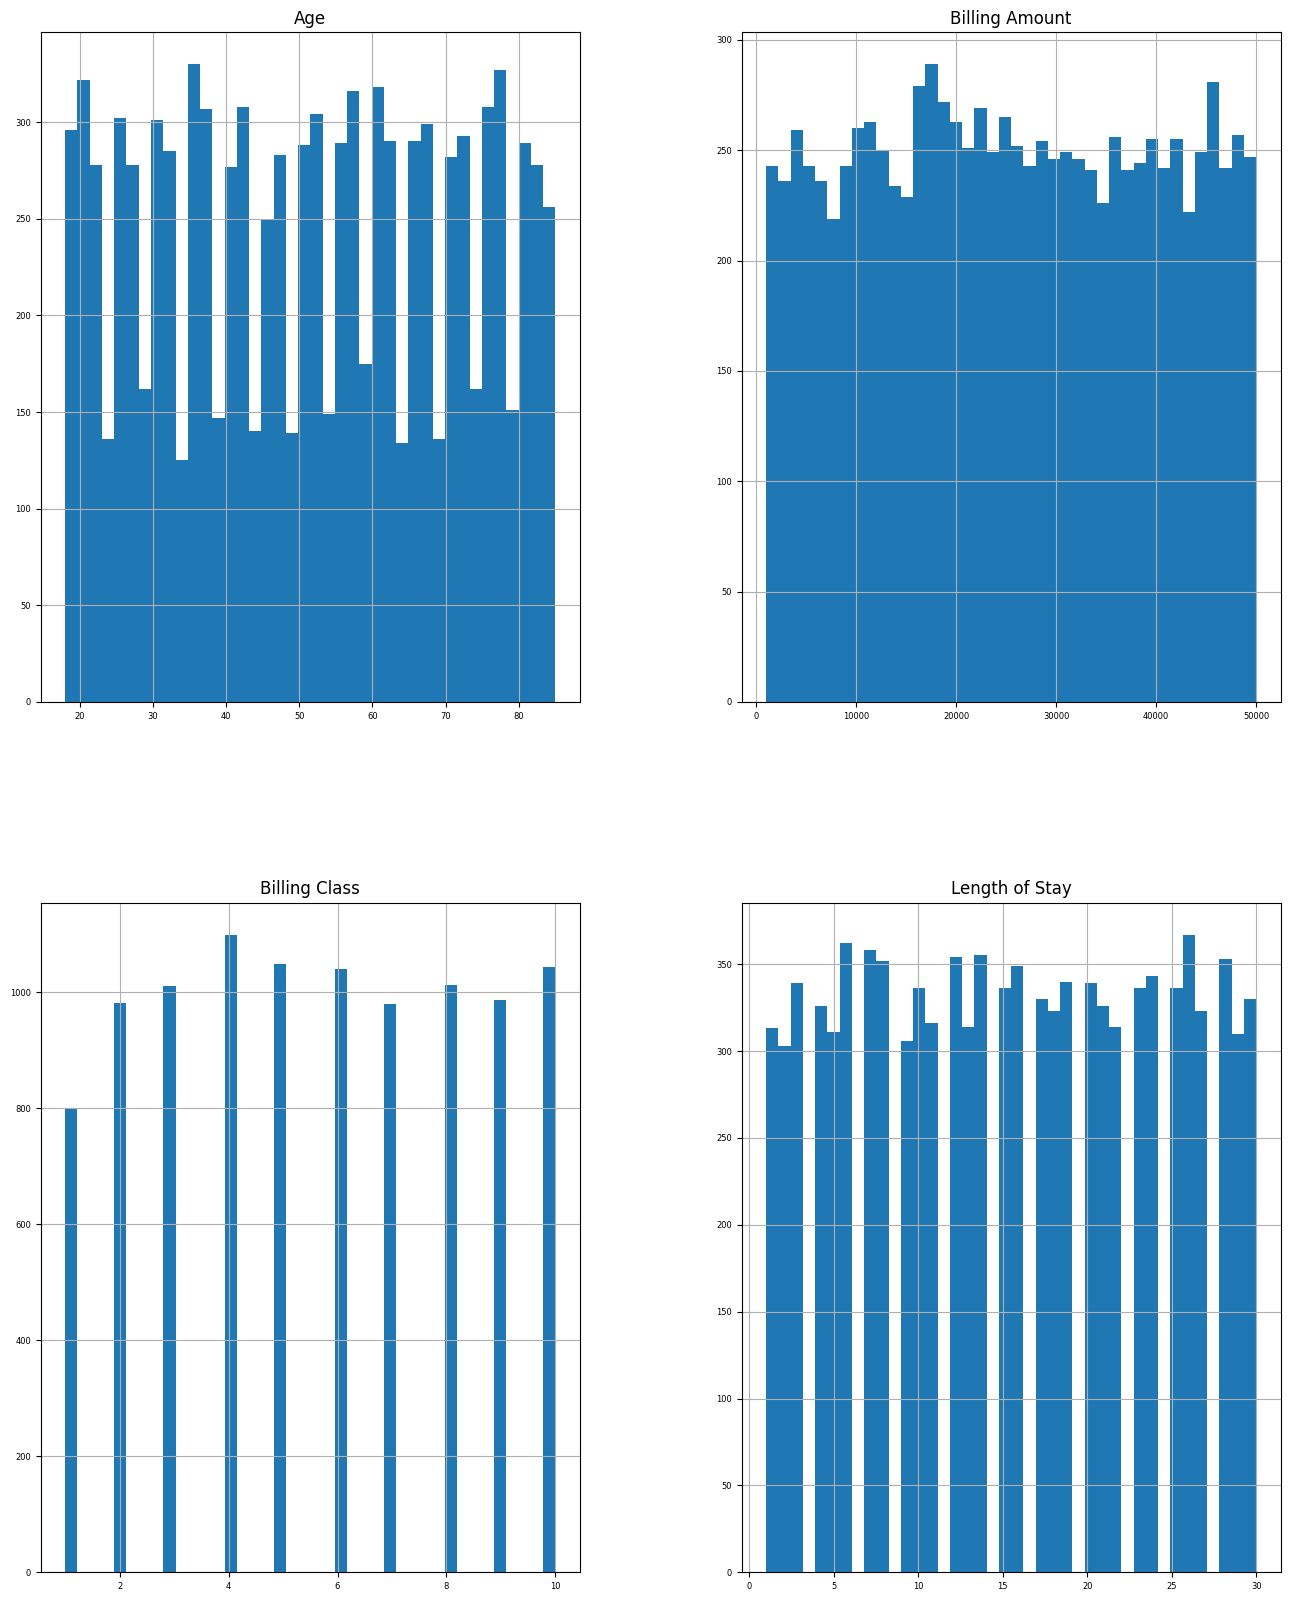

In [ ]:
num_data.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);

In [ ]:
# selecting the columns to correlate
correlation_columns = ['Age','Billing Amount','Length of Stay','Billing Class']
# creating a df using the above columns
correlate_df = df[correlation_columns]
#encoding categorical columns for correlation
correlate_df['Gender'] = df['Gender'].astype('category').cat.codes
correlate_df['Admission Type'] = df['Admission Type'].astype('category').cat.codes
correlate_df['Test Results'] = df['Test Results'].astype('category').cat.codes
# creating correlation matrix
print(correlate_df)
correlation_matrix = correlate_df.corr()
correlation_matrix

      Age  Billing Amount  Length of Stay  Billing Class  Gender  \
0      81    37490.983364              14              8       0   
1      35    47304.064845              14             10       1   
2      61    36874.896997              30              8       1   
3      49    23303.322092               1              5       1   
4      51    18086.344184              24              4       1   
...   ...             ...             ...            ...     ...   
9995   83    39606.840083               4              8       1   
9996   47     5995.717488              23              2       0   
9997   54    49559.202905              14             10       1   
9998   84    25236.344761              20              6       1   
9999   20    37223.965865              24              8       1   

      Admission Type  Test Results  
0                  0             1  
1                  1             2  
2                  1             2  
3                  2             0 

<ipython-input-91-44fa01c12f40>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlate_df['Gender'] = df['Gender'].astype('category').cat.codes
<ipython-input-91-44fa01c12f40>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlate_df['Admission Type'] = df['Admission Type'].astype('category').cat.codes
<ipython-input-91-44fa01c12f40>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Age,Billing Amount,Length of Stay,Billing Class,Gender,Admission Type,Test Results
Age,1.000000,-0.009483,0.009111,-0.007934,-0.008099,0.003233,0.008747
Billing Amount,-0.009483,1.000000,-0.013507,0.994832,0.002340,0.002531,-0.005844
Length of Stay,0.009111,-0.013507,1.000000,-0.013324,-0.006361,-0.005942,-0.008228
Billing Class,-0.007934,0.994832,-0.013324,1.000000,0.001173,0.003866,-0.005976
Gender,-0.008099,0.002340,-0.006361,0.001173,1.000000,-0.004515,-0.010472
Admission Type,0.003233,0.002531,-0.005942,0.003866,-0.004515,1.000000,-0.010964
Test Results,0.008747,-0.005844,-0.008228,-0.005976,-0.010472,-0.010964,1.000000


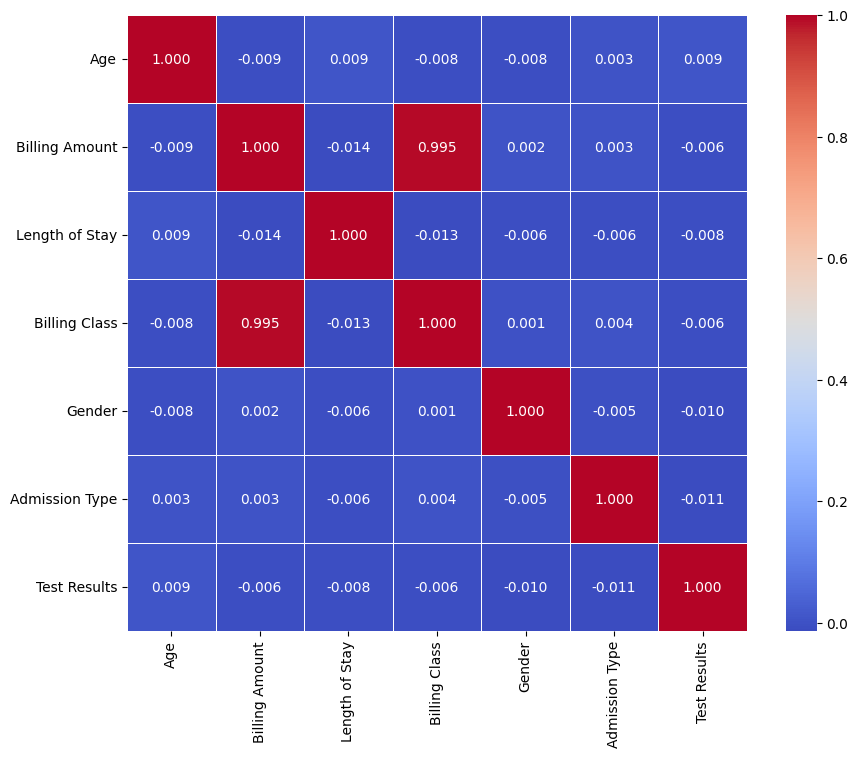

In [ ]:
#plotting correlation matrix using heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.3f',linewidths = 0.5)
plt.show()

In [ ]:
df = df.drop('Billing Amount', axis=1)

In [ ]:
df.head(5)

,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Billing Class,Length of Stay
0,81,Female,O-,Diabetes,Elective,Aspirin,Inconclusive,8,14
1,35,Male,O+,Asthma,Emergency,Lipitor,Normal,10,14
2,61,Male,B-,Obesity,Emergency,Lipitor,Normal,8,30
3,49,Male,B-,Asthma,Urgent,Penicillin,Abnormal,5,1
4,51,Male,O-,Arthritis,Urgent,Paracetamol,Normal,4,24


# **Pateint Health Outcome**

In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Blood Type'] = label_encoder.fit_transform(df['Blood Type'])
df['Medical Condition'] = label_encoder.fit_transform(df['Medical Condition'])
df['Admission Type'] = label_encoder.fit_transform(df['Admission Type'])
df['Medication'] = label_encoder.fit_transform(df['Medication'])
df['Test Results'] = label_encoder.fit_transform(df['Test Results'])

In [ ]:
colums_to_drop_now = ['Billing Class','Test Results','Length of Stay','Medication','Admission Type']
X = df.drop(columns=colums_to_drop_now, axis=1)
y= df['Test Results']

In [ ]:
X

,Age,Gender,Blood Type,Medical Condition
0,81,0,7,3
1,35,1,6,1
2,61,1,5,5
3,49,1,5,1
4,51,1,7,0
...,...,...,...,...
9995,83,1,0,5
9996,47,0,2,0
9997,54,1,5,0
9998,84,1,0,0


In [ ]:
y

0       1
1       2
2       2
3       0
4       2
       ..
9995    0
9996    2
9997    2
9998    2
9999    0
Name: Test Results, Length: 10000, dtype: int64

In [ ]:
df.head(5)

,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Billing Class,Length of Stay
0,81,0,7,3,0,0,1,8,14
1,35,1,6,1,1,2,2,10,14
2,61,1,5,5,1,2,2,8,30
3,49,1,5,1,2,4,0,5,1
4,51,1,7,0,2,3,2,4,24


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
def evaluate_model(model, X_test, y_test):
    # Generate predictions
    predictions = model.predict(X_test)

    # Basic metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

    # Detailed classification report
    print("\nClassification Report:\n", classification_report(y_test, predictions))

    # # Confusion matrix
    cm = confusion_matrix(y_test, predictions)

    plt.figure(figsize=(14, 12))  # Increase figure size
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.xticks(rotation=90, fontsize=8)  # Rotate x labels and adjust font size
    plt.yticks(rotation=0, fontsize=8)  # Adjust font size
    plt.tight_layout()  # Adjust layout to make room for label rotations
    plt.show()


    # print('Training set score: {:.4f}'.format(model.score(X_train, y_train)*100))
    # print('Test set score: {:.4f}'.format(model.score(X_test, y_test)*100))

    # cross_val_scores = cross_val_score(model,X_train, y_train, cv=5)
    # print("Cross-Validation Scores:", cross_val_scores*100)
    # print("Mean Value:",np.mean(cross_val_scores)*100)

Random Forest Performance:
Accuracy: 0.3396666666666667, Precision: 0.33859816505089996, Recall: 0.33871719042995546, F1 Score: 0.33862760553636867

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.37      0.37      1063
           1       0.33      0.33      0.33       961
           2       0.32      0.31      0.32       976

    accuracy                           0.34      3000
   macro avg       0.34      0.34      0.34      3000
weighted avg       0.34      0.34      0.34      3000



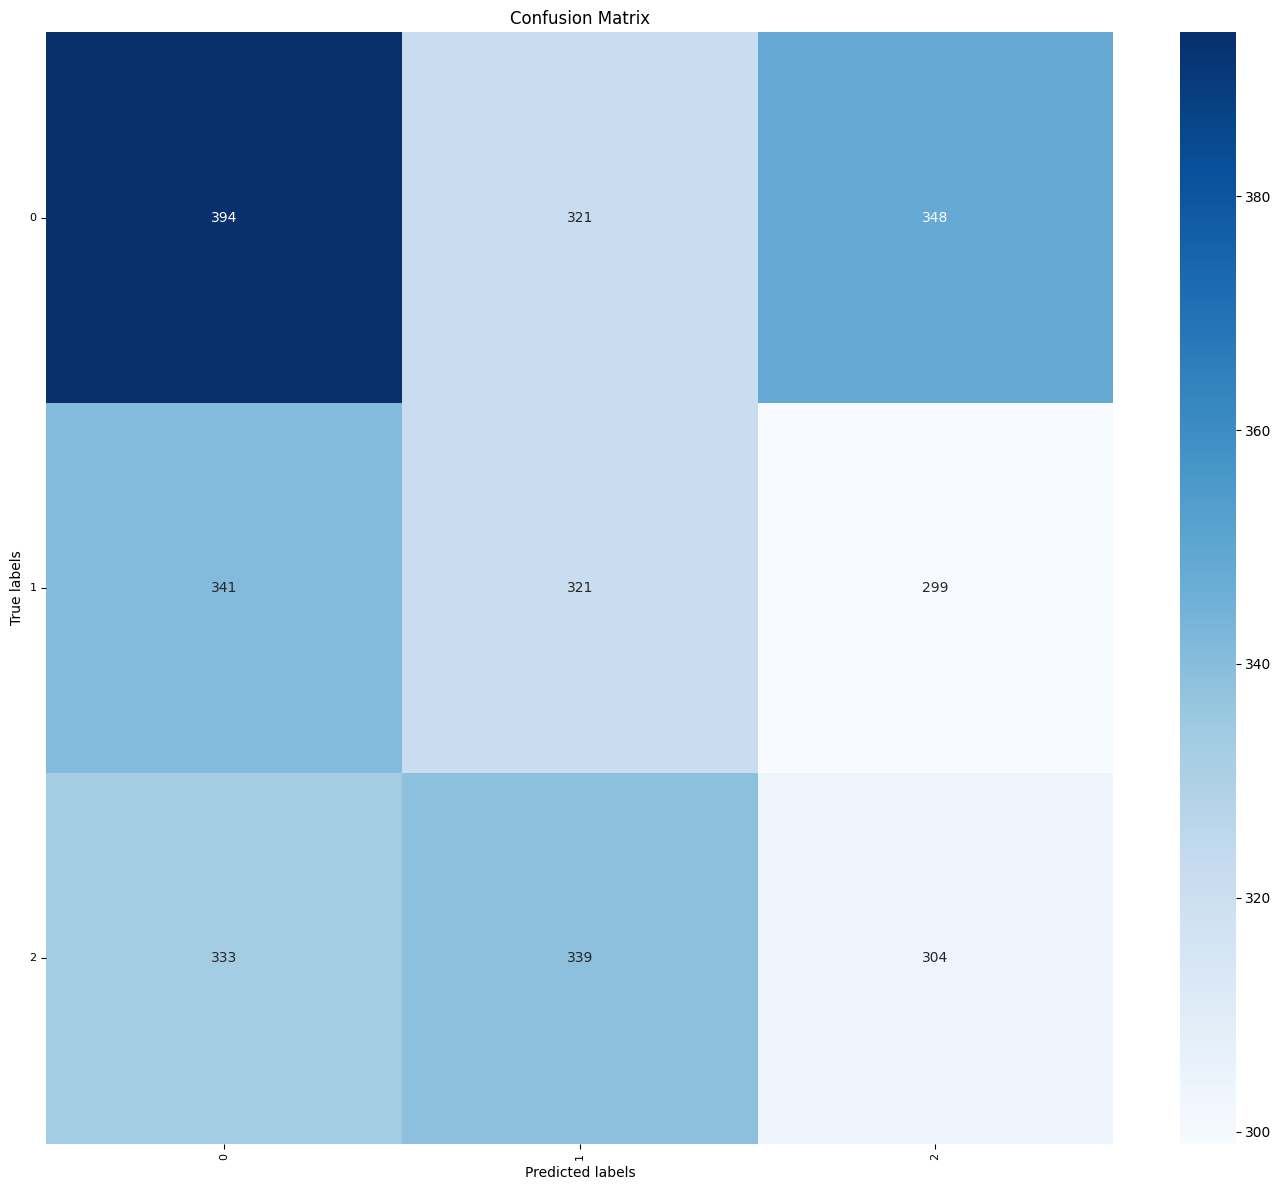

Training set score: 76.4286
Test set score: 33.9667
Cross-Validation Scores: [33.64285714 33.5        34.35714286 33.42857143 34.42857143]
Mean Value: 33.871428571428574


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Performance:")
evaluate_model(rf, X_test, y_test)

Gradient Boosting Performance:
Accuracy: 0.3566666666666667, Precision: 0.3559907887010867, Recall: 0.3525066376873613, F1 Score: 0.3477043168846142

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.49      0.42      1063
           1       0.33      0.31      0.32       961
           2       0.37      0.26      0.30       976

    accuracy                           0.36      3000
   macro avg       0.36      0.35      0.35      3000
weighted avg       0.36      0.36      0.35      3000



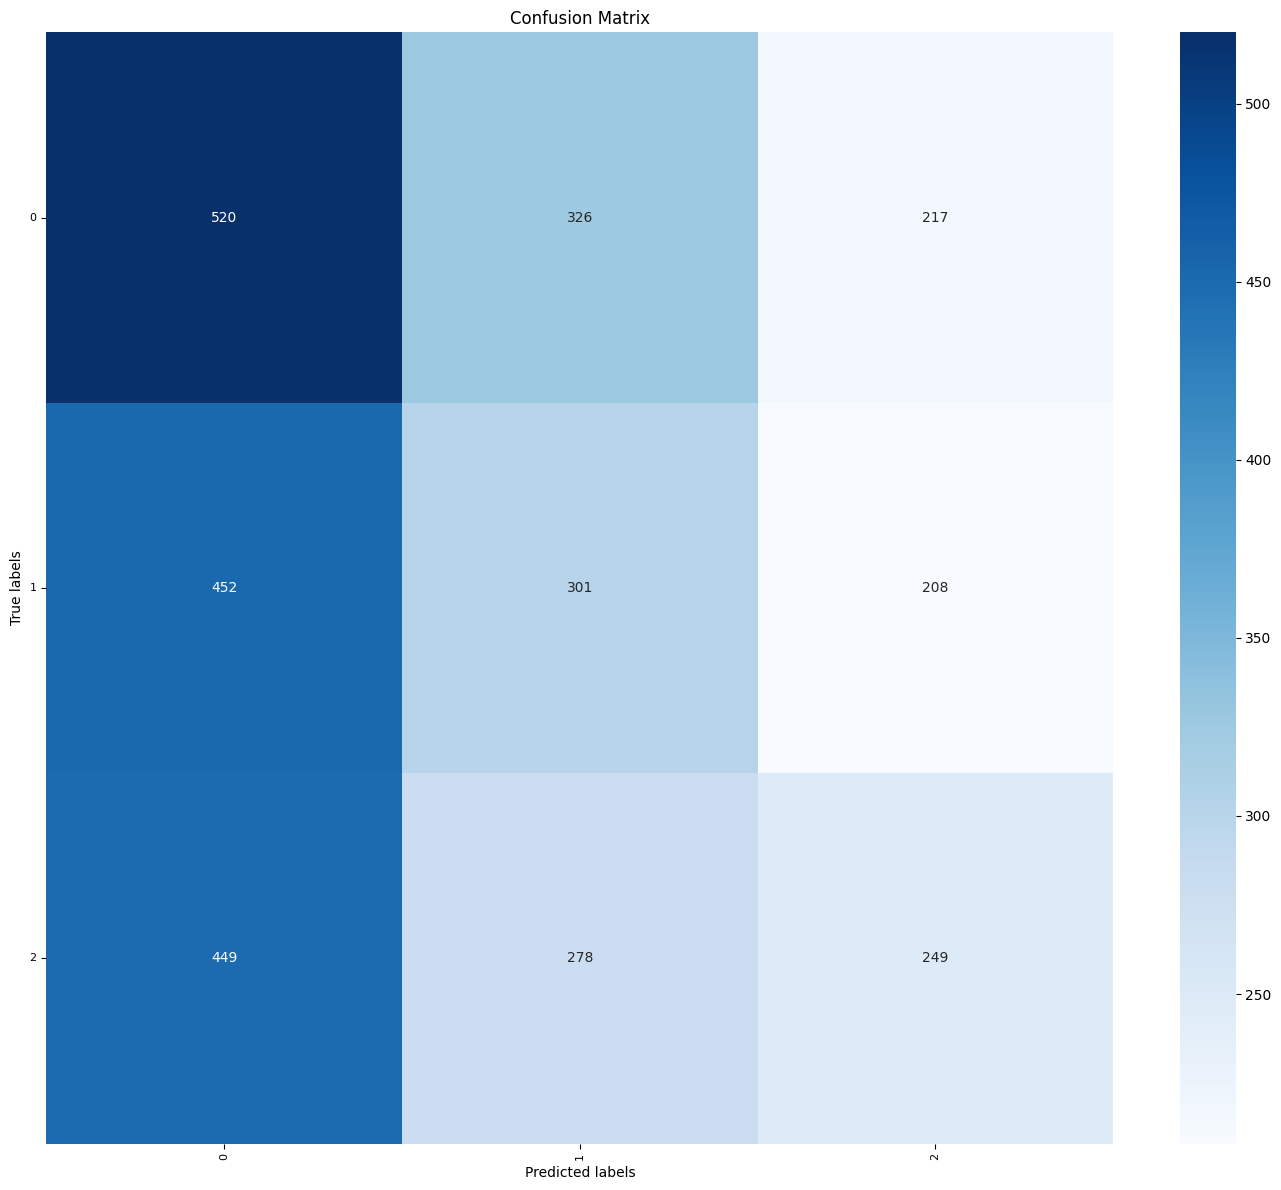

Training set score: 43.1714
Test set score: 35.6667
Cross-Validation Scores: [33.42857143 32.07142857 31.5        36.         33.57142857]
Mean Value: 33.31428571428571


In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
print("Gradient Boosting Performance:")
evaluate_model(gb, X_test, y_test)

Neural Network Performance:
Accuracy: 0.317, Precision: 0.33318643560616007, Recall: 0.32253973248568385, F1 Score: 0.2400261807242813

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.21      0.26      1063
           1       0.31      0.75      0.44       961
           2       0.35      0.01      0.03       976

    accuracy                           0.32      3000
   macro avg       0.33      0.32      0.24      3000
weighted avg       0.33      0.32      0.24      3000



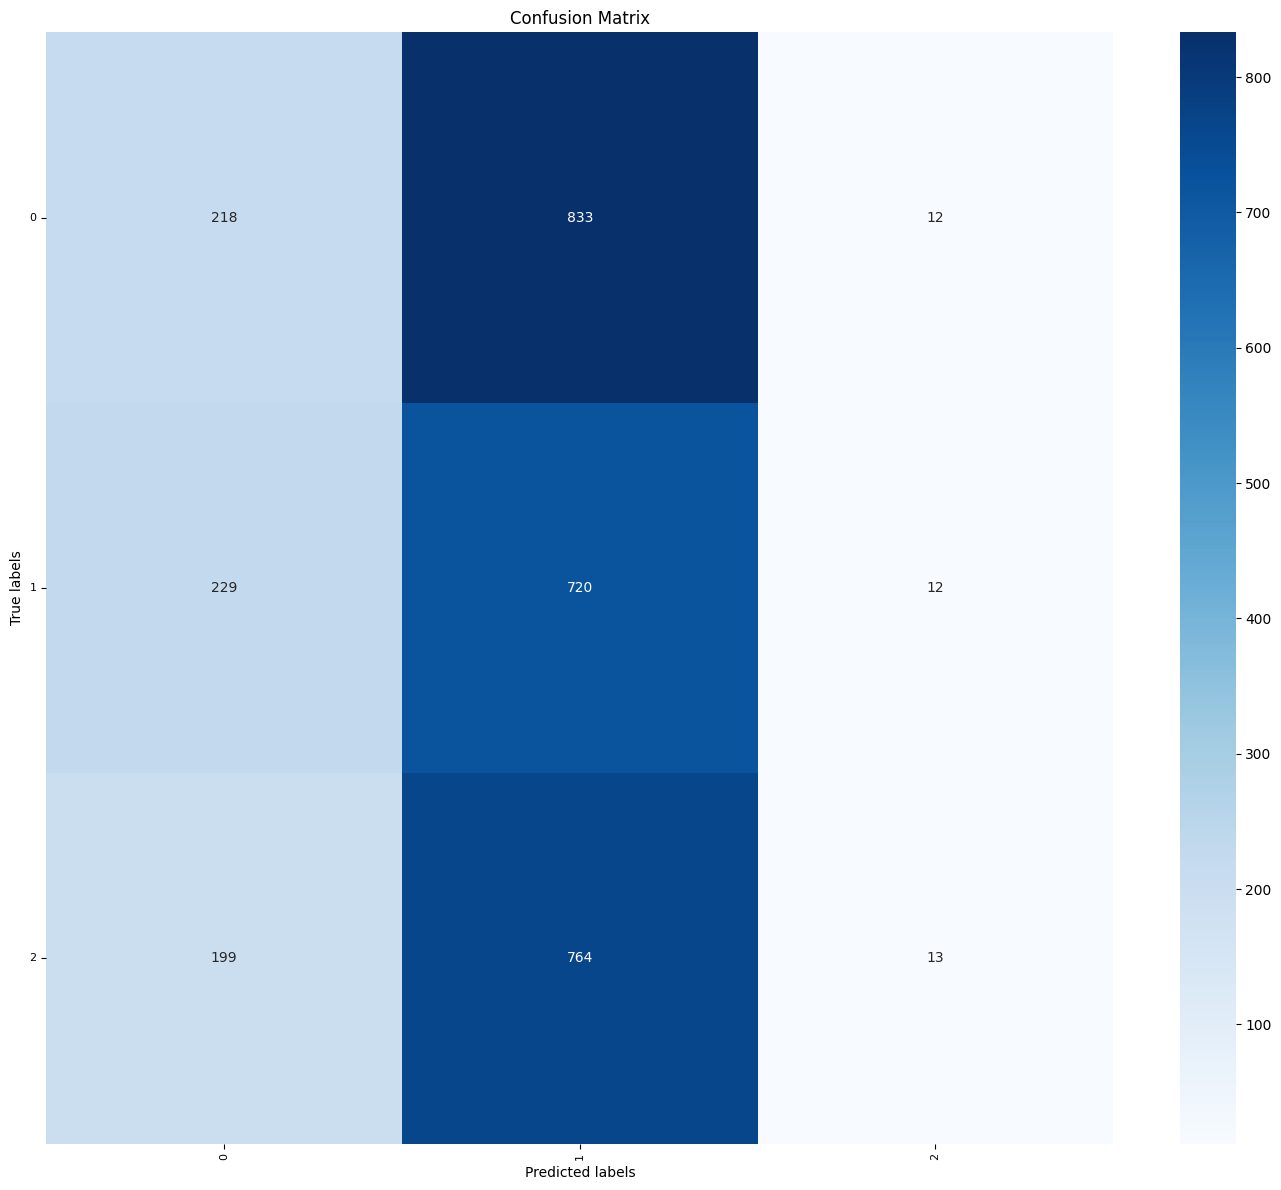

Training set score: 34.2000
Test set score: 31.7000
Cross-Validation Scores: [34.07142857 33.42857143 33.92857143 33.14285714 33.42857143]
Mean Value: 33.599999999999994


In [ ]:
nn = MLPClassifier(random_state=42)
nn.fit(X_train, y_train)
print("Neural Network Performance:")
evaluate_model(nn, X_test, y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.6846555155378419
Root Mean Squared Error: 0.8241862006536687
R-squared: -0.0006735553820584883


**With Scaling**

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size=0.3, random_state=42)

Random Forest Performance:
Accuracy: 0.337, Precision: 0.3359602533629434, Recall: 0.3360154978430812, F1 Score: 0.33597665114288566

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.37      0.37      1063
           1       0.32      0.32      0.32       961
           2       0.32      0.32      0.32       976

    accuracy                           0.34      3000
   macro avg       0.34      0.34      0.34      3000
weighted avg       0.34      0.34      0.34      3000



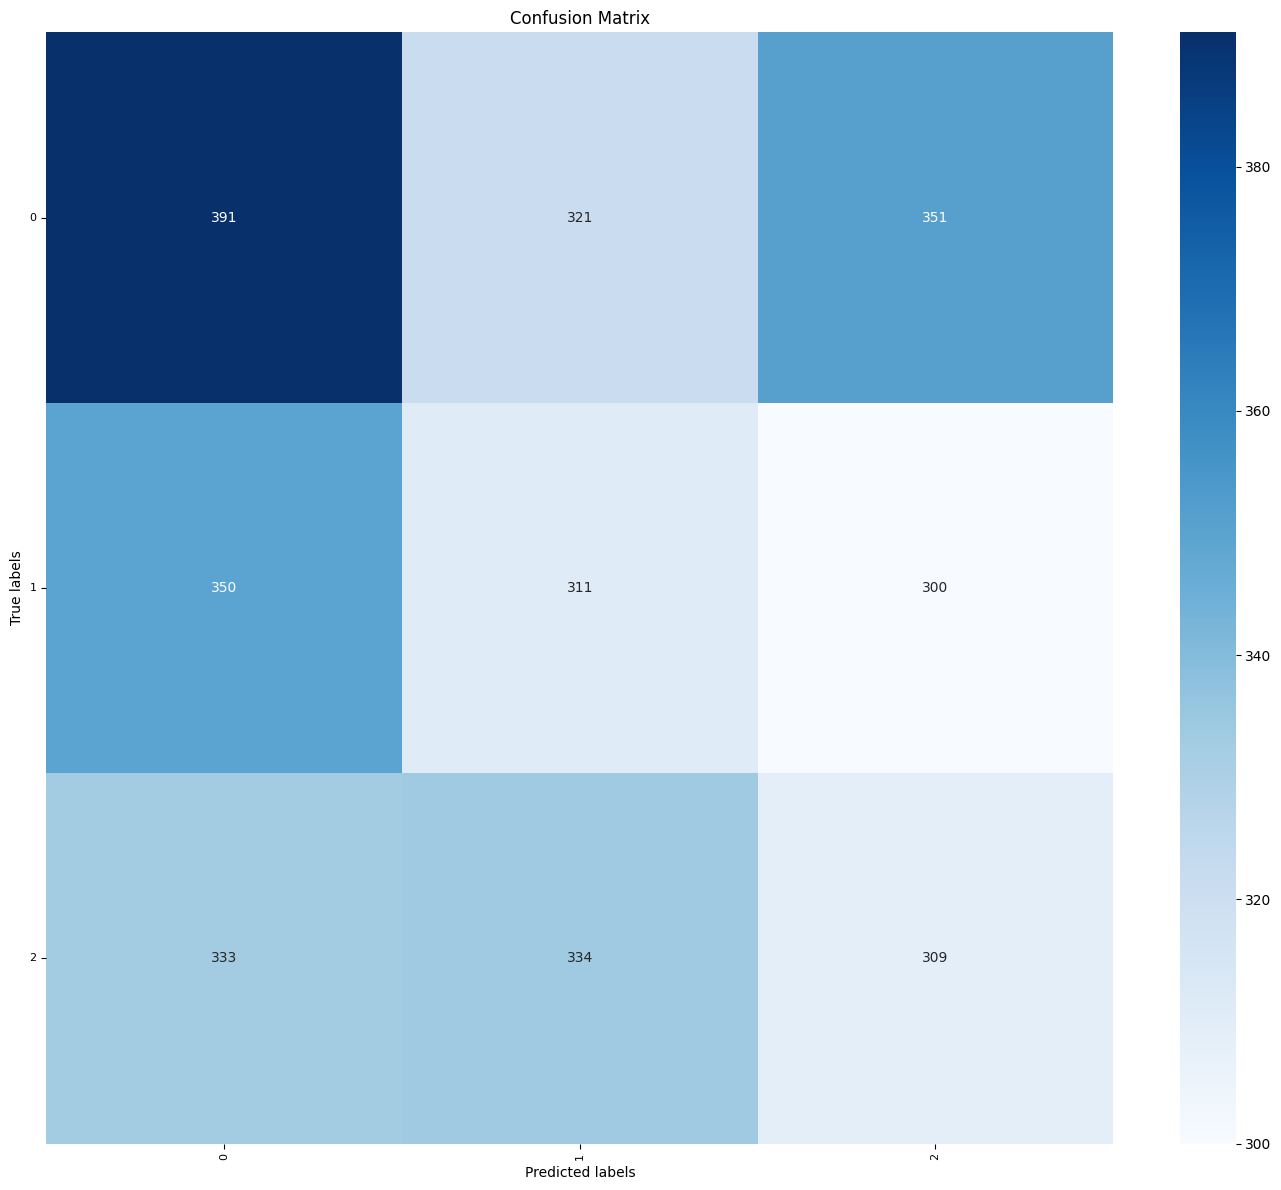

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Training set score: 33.0429
Test set score: 33.7000
Cross-Validation Scores: [33.64285714 33.5        34.35714286 33.42857143 34.42857143]
Mean Value: 33.871428571428574


In [ ]:
rf_scaled = RandomForestClassifier(random_state=42)
rf_scaled.fit(X_train_scaled, y_train_scaled)
print("Random Forest Performance:")
evaluate_model(rf_scaled, X_test_scaled, y_test_scaled)

Gradient Boosting Performance:
Accuracy: 0.3566666666666667, Precision: 0.3559907887010867, Recall: 0.3525066376873613, F1 Score: 0.3477043168846142

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.49      0.42      1063
           1       0.33      0.31      0.32       961
           2       0.37      0.26      0.30       976

    accuracy                           0.36      3000
   macro avg       0.36      0.35      0.35      3000
weighted avg       0.36      0.36      0.35      3000



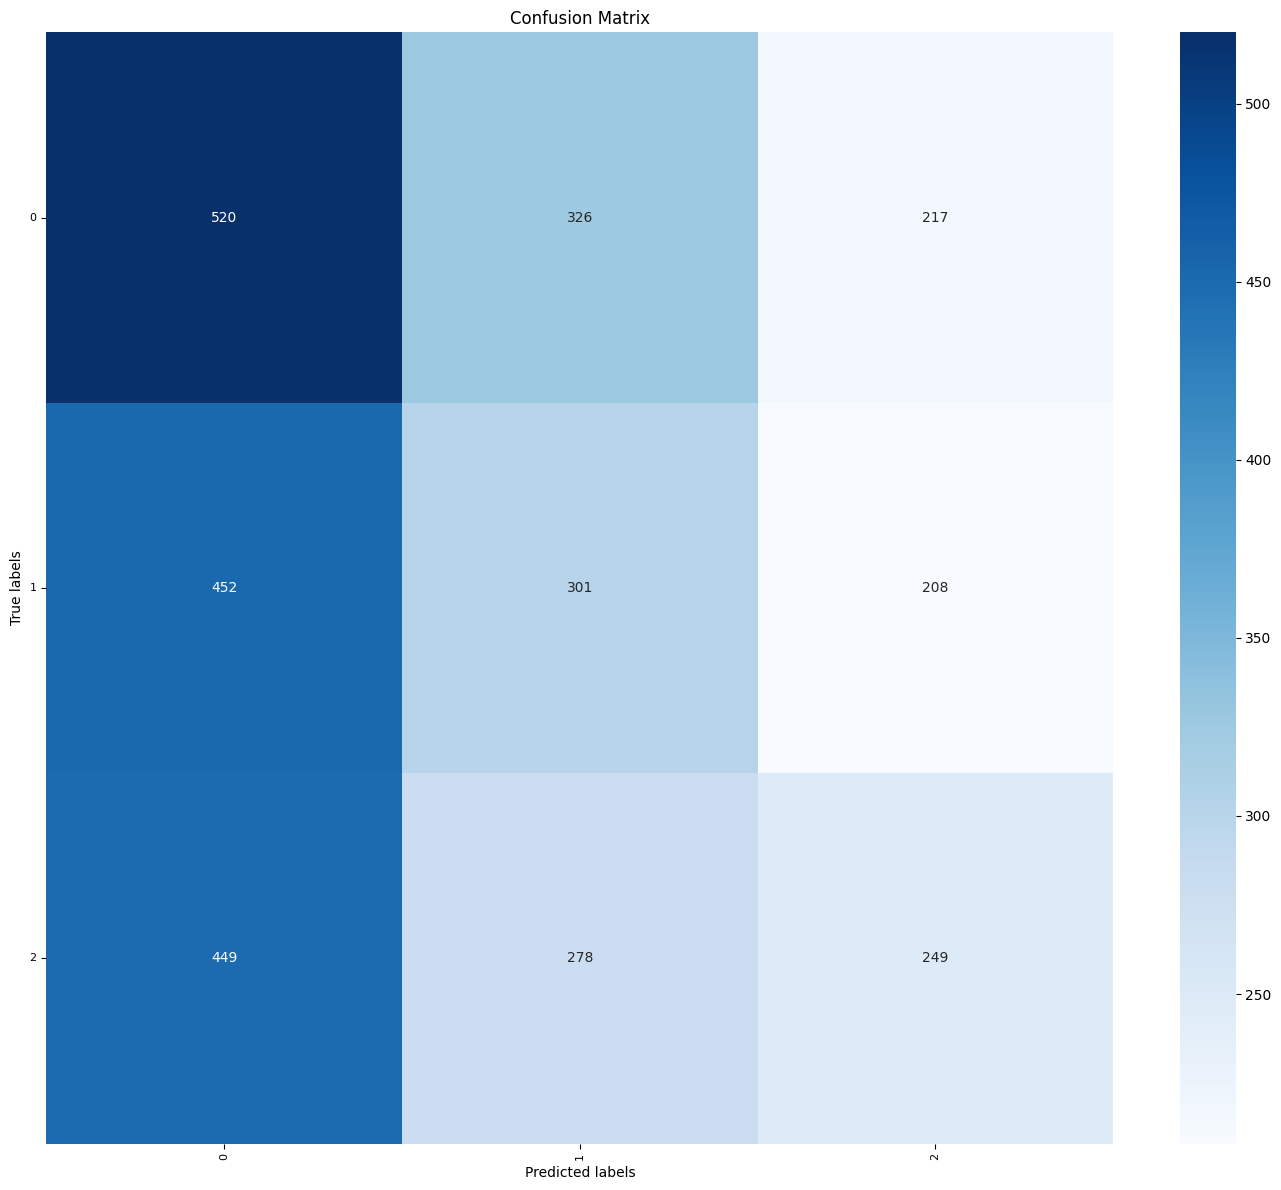

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Training set score: 33.1429
Test set score: 35.6667
Cross-Validation Scores: [33.42857143 32.07142857 31.5        36.         33.57142857]
Mean Value: 33.31428571428571


In [ ]:
gb_scaled = GradientBoostingClassifier(random_state=42)
gb_scaled.fit(X_train_scaled, y_train_scaled)
print("Gradient Boosting Performance:")
evaluate_model(gb_scaled, X_test_scaled, y_test_scaled)

Neural Network Performance:
Accuracy: 0.32566666666666666, Precision: 0.3222050950767395, Recall: 0.3227017319439233, F1 Score: 0.31931866519266117

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.41      0.37      1063
           1       0.30      0.22      0.25       961
           2       0.34      0.34      0.34       976

    accuracy                           0.33      3000
   macro avg       0.32      0.32      0.32      3000
weighted avg       0.32      0.33      0.32      3000



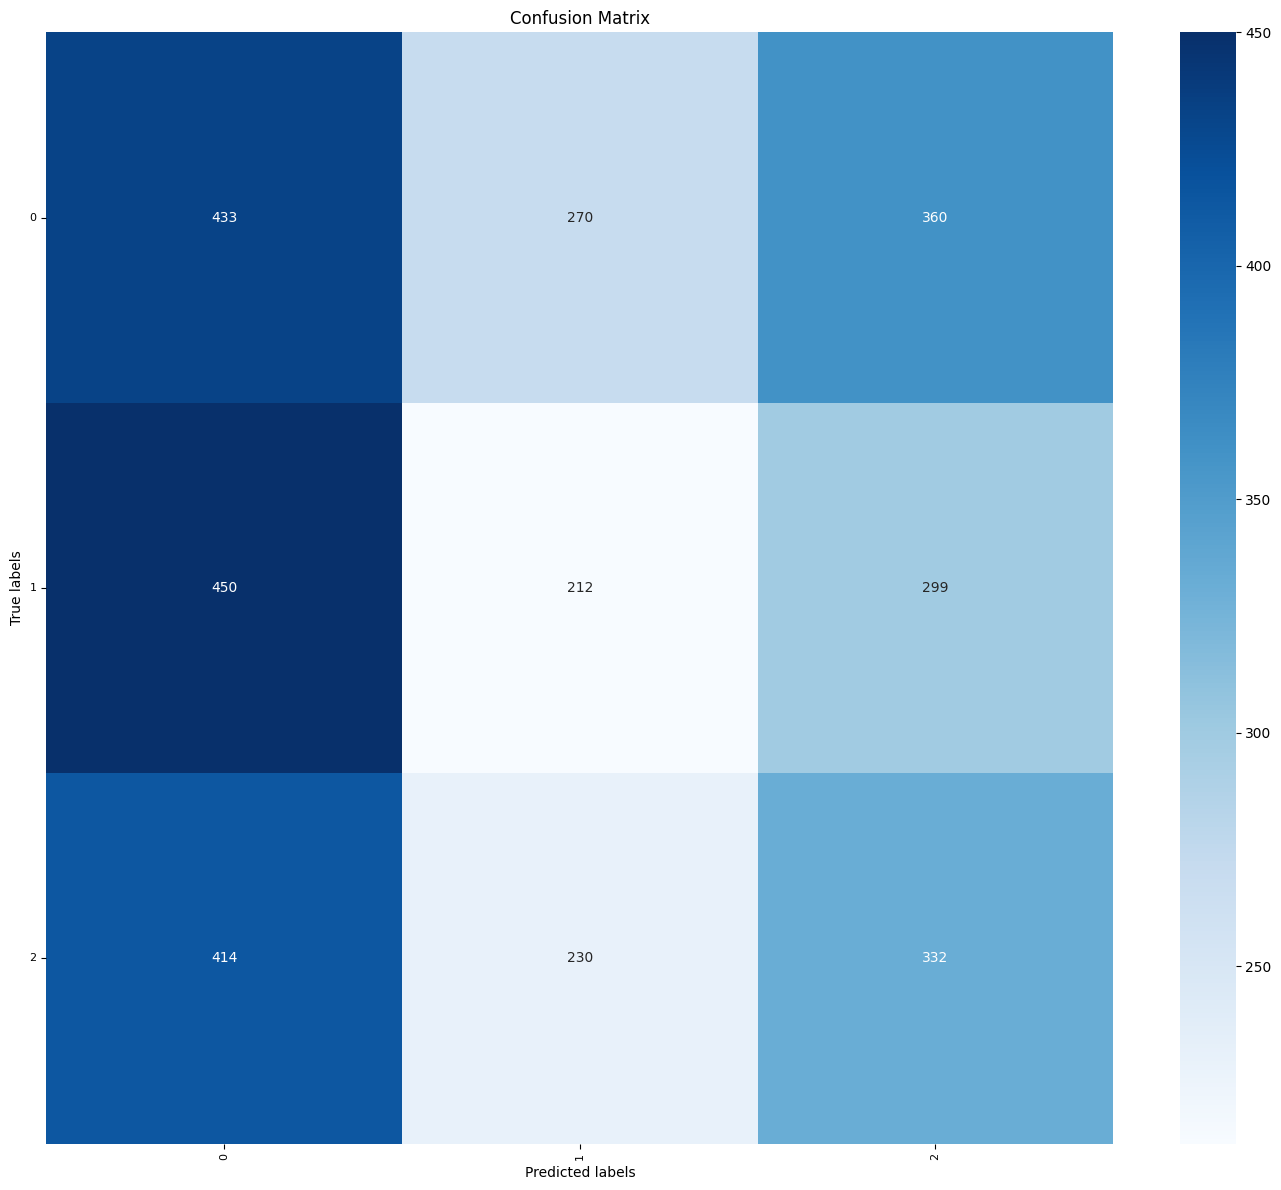

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Training set score: 32.7286
Test set score: 32.5667
Cross-Validation Scores: [34.07142857 33.42857143 33.92857143 33.14285714 33.42857143]
Mean Value: 33.599999999999994


In [ ]:
nn_scaled = MLPClassifier(random_state=42)
nn_scaled.fit(X_train_scaled, y_train_scaled)
print("Neural Network Performance:")
evaluate_model(nn_scaled, X_test_scaled, y_test_scaled)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train_scaled)

# Predict on the test set
y_pred = lr_scaled.predict(X_test_scaled)

mae = mean_absolute_error(y_test_scaled, y_pred)
rmse = mean_squared_error(y_test_scaled, y_pred, squared=False)
r2 = r2_score(y_test_scaled, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.6846555155378419
Root Mean Squared Error: 0.8241862006536687
R-squared: -0.0006735553820584883


In [ ]:
colums_to_drop_now = ['Billing Class','Test Results']
X_ = df.drop(columns=colums_to_drop_now, axis=1)
y_ = df['Billing Class']

In [ ]:
X_

,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Length of Stay
0,81,0,7,3,0,0,14
1,35,1,6,1,1,2,14
2,61,1,5,5,1,2,30
3,49,1,5,1,2,4,1
4,51,1,7,0,2,3,24
...,...,...,...,...,...,...,...
9995,83,1,0,5,0,1,4
9996,47,0,2,0,1,1,23
9997,54,1,5,0,0,1,14
9998,84,1,0,0,2,4,20


In [ ]:
y_

0        8
1       10
2        8
3        5
4        4
        ..
9995     8
9996     2
9997    10
9998     6
9999     8
Name: Billing Class, Length: 10000, dtype: int64

In [ ]:
X_train_,X_test_,y_train_,y_test_ = train_test_split(X_,y_,test_size=0.3,random_state=42)

Random Forest Performance:
Accuracy: 0.098, Precision: 0.09666883782347262, Recall: 0.09687087073706954, F1 Score: 0.09591506667683937

Classification Report:
               precision    recall  f1-score   support

           1       0.05      0.04      0.04       236
           2       0.10      0.09      0.09       305
           3       0.12      0.13      0.12       298
           4       0.09      0.11      0.10       332
           5       0.12      0.12      0.12       318
           6       0.09      0.13      0.11       272
           7       0.12      0.09      0.10       311
           8       0.11      0.10      0.10       321
           9       0.09      0.09      0.09       292
          10       0.08      0.08      0.08       315

    accuracy                           0.10      3000
   macro avg       0.10      0.10      0.10      3000
weighted avg       0.10      0.10      0.10      3000



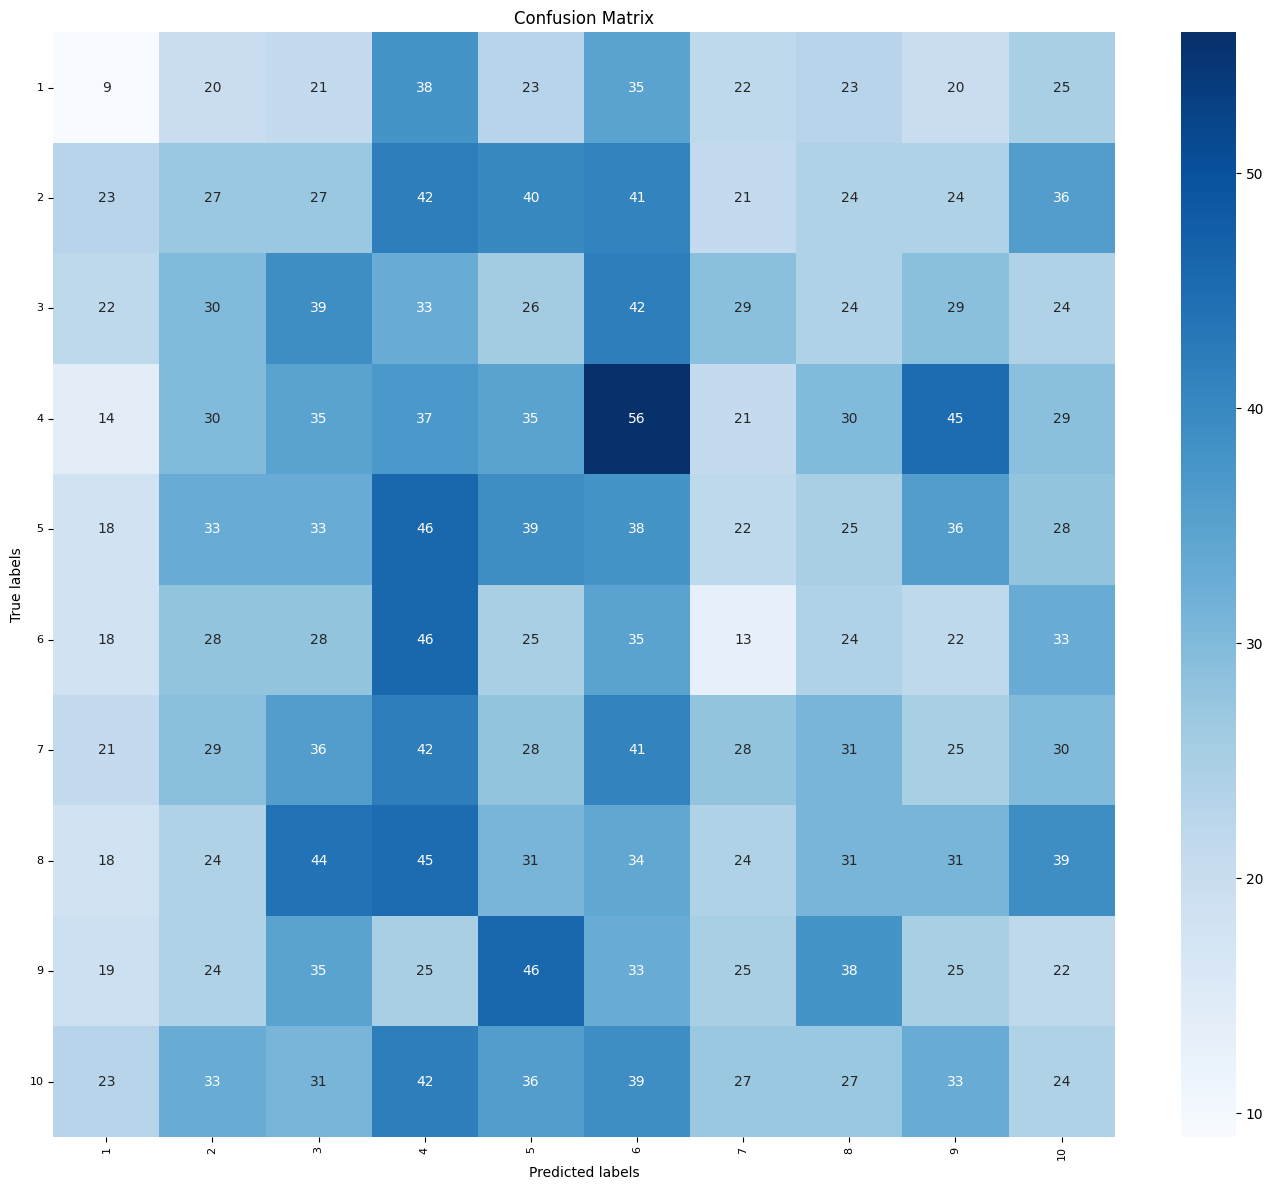

In [ ]:
rf_ = RandomForestClassifier(random_state=42)
rf_.fit(X_train_, y_train_)
print("Random Forest Performance:")
evaluate_model(rf_, X_test_, y_test_)

Gradient Boosting Performance:
Accuracy: 0.101, Precision: 0.09971155351541486, Recall: 0.0998774112396126, F1 Score: 0.09601362502582046

Classification Report:
               precision    recall  f1-score   support

           1       0.07      0.02      0.03       236
           2       0.07      0.06      0.06       305
           3       0.08      0.08      0.08       298
           4       0.10      0.14      0.12       332
           5       0.12      0.13      0.12       318
           6       0.09      0.18      0.12       272
           7       0.13      0.08      0.10       311
           8       0.10      0.09      0.09       321
           9       0.12      0.14      0.13       292
          10       0.12      0.10      0.10       315

    accuracy                           0.10      3000
   macro avg       0.10      0.10      0.10      3000
weighted avg       0.10      0.10      0.10      3000



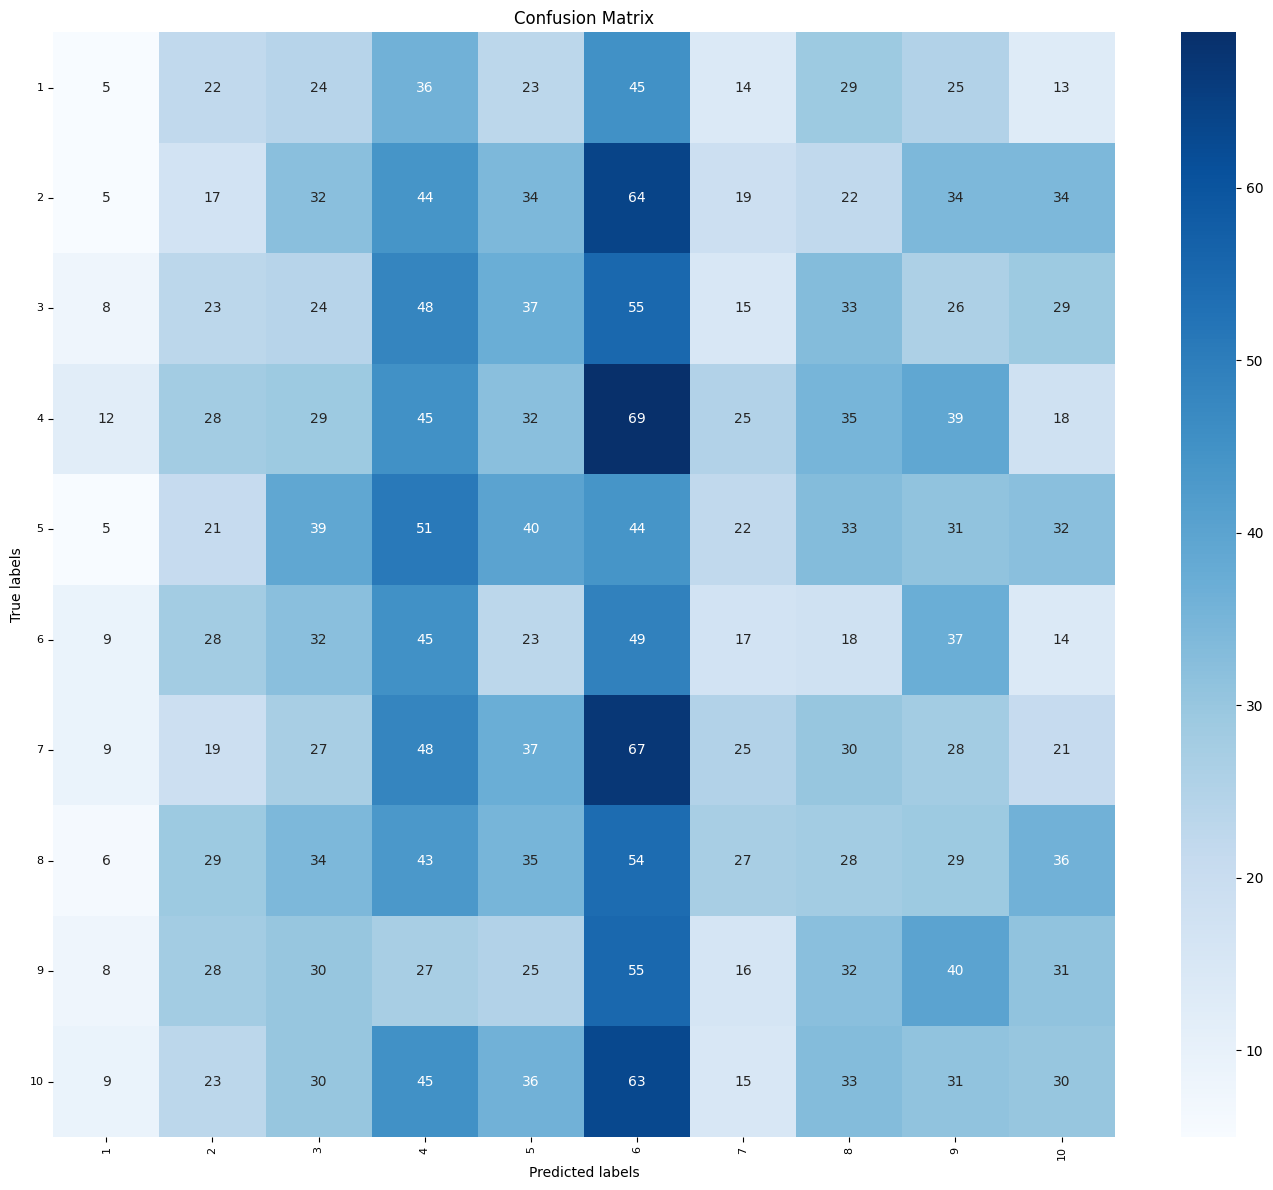

In [ ]:
gb_ = GradientBoostingClassifier(random_state=42)
gb_.fit(X_train_, y_train_)
print("Gradient Boosting Performance:")
evaluate_model(gb_, X_test_, y_test_)

Neural Network Performance:
Accuracy: 0.09166666666666666, Precision: 0.08564874555780527, Recall: 0.09272691083743745, F1 Score: 0.048734606014597184

Classification Report:
               precision    recall  f1-score   support

           1       0.05      0.00      0.01       236
           2       0.00      0.00      0.00       305
           3       0.09      0.65      0.16       298
           4       0.06      0.01      0.02       332
           5       0.25      0.02      0.03       318
           6       0.08      0.13      0.10       272
           7       0.00      0.00      0.00       311
           8       0.14      0.05      0.07       321
           9       0.09      0.03      0.04       292
          10       0.08      0.04      0.05       315

    accuracy                           0.09      3000
   macro avg       0.09      0.09      0.05      3000
weighted avg       0.09      0.09      0.05      3000



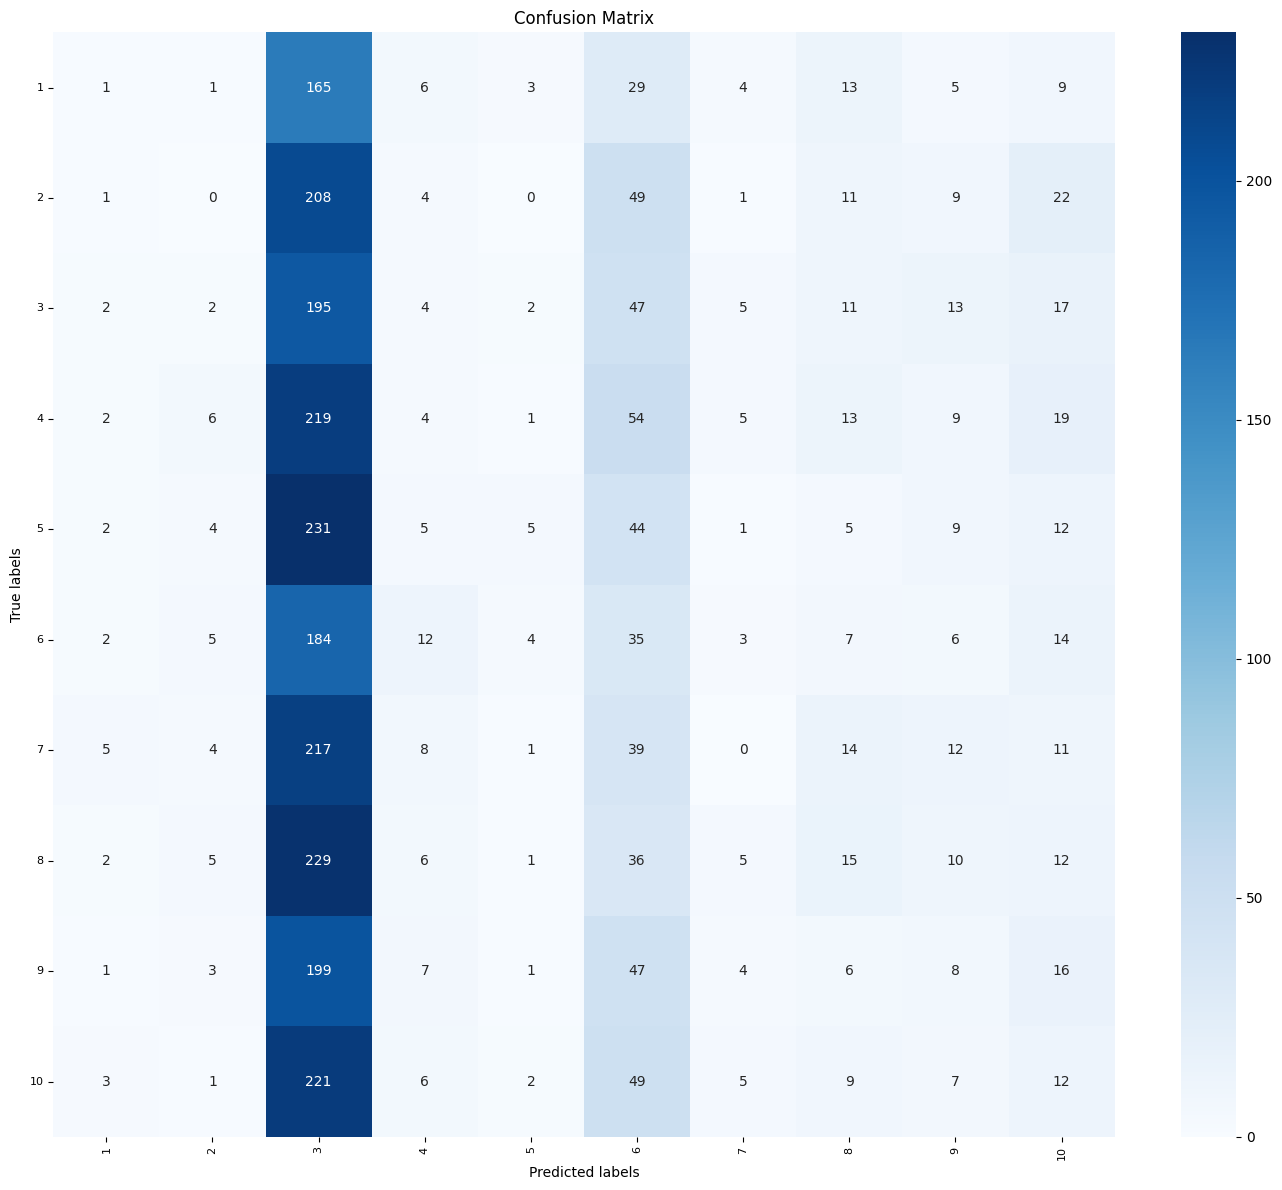

In [ ]:
nn_ = MLPClassifier(random_state=42)
nn_.fit(X_train_, y_train_)
print("Neural Network Performance:")
evaluate_model(nn_, X_test_, y_test_)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr_ = LinearRegression()
lr_.fit(X_train_, y_train_)

# Predict on the test set
y_pred = lr_.predict(X_test_)

mae = mean_absolute_error(y_test_, y_pred)
rmse = mean_squared_error(y_test_, y_pred, squared=False)
r2 = r2_score(y_test_, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 2.4584415286026133
Root Mean Squared Error: 2.8257482095709845
R-squared: -0.0022264507701472702


In [ ]:
scaler = StandardScaler()
X_ = scaler.fit_transform(X_)

In [ ]:
X_train_scaled_,X_test_scaled_,y_train_scaled_,y_test_scaled_ = train_test_split(X_,y_,test_size=0.3,random_state=42)

Random Forest Performance:
Accuracy: 0.104, Precision: 0.051556494540573185, Recall: 0.09876940044630277, F1 Score: 0.0505321755639986

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       236
           2       0.09      0.26      0.14       305
           3       0.00      0.00      0.00       298
           4       0.11      0.30      0.17       332
           5       0.00      0.00      0.00       318
           6       0.14      0.00      0.01       272
           7       0.11      0.40      0.17       311
           8       0.06      0.02      0.02       321
           9       0.00      0.00      0.00       292
          10       0.00      0.00      0.00       315

    accuracy                           0.10      3000
   macro avg       0.05      0.10      0.05      3000
weighted avg       0.05      0.10      0.05      3000



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use

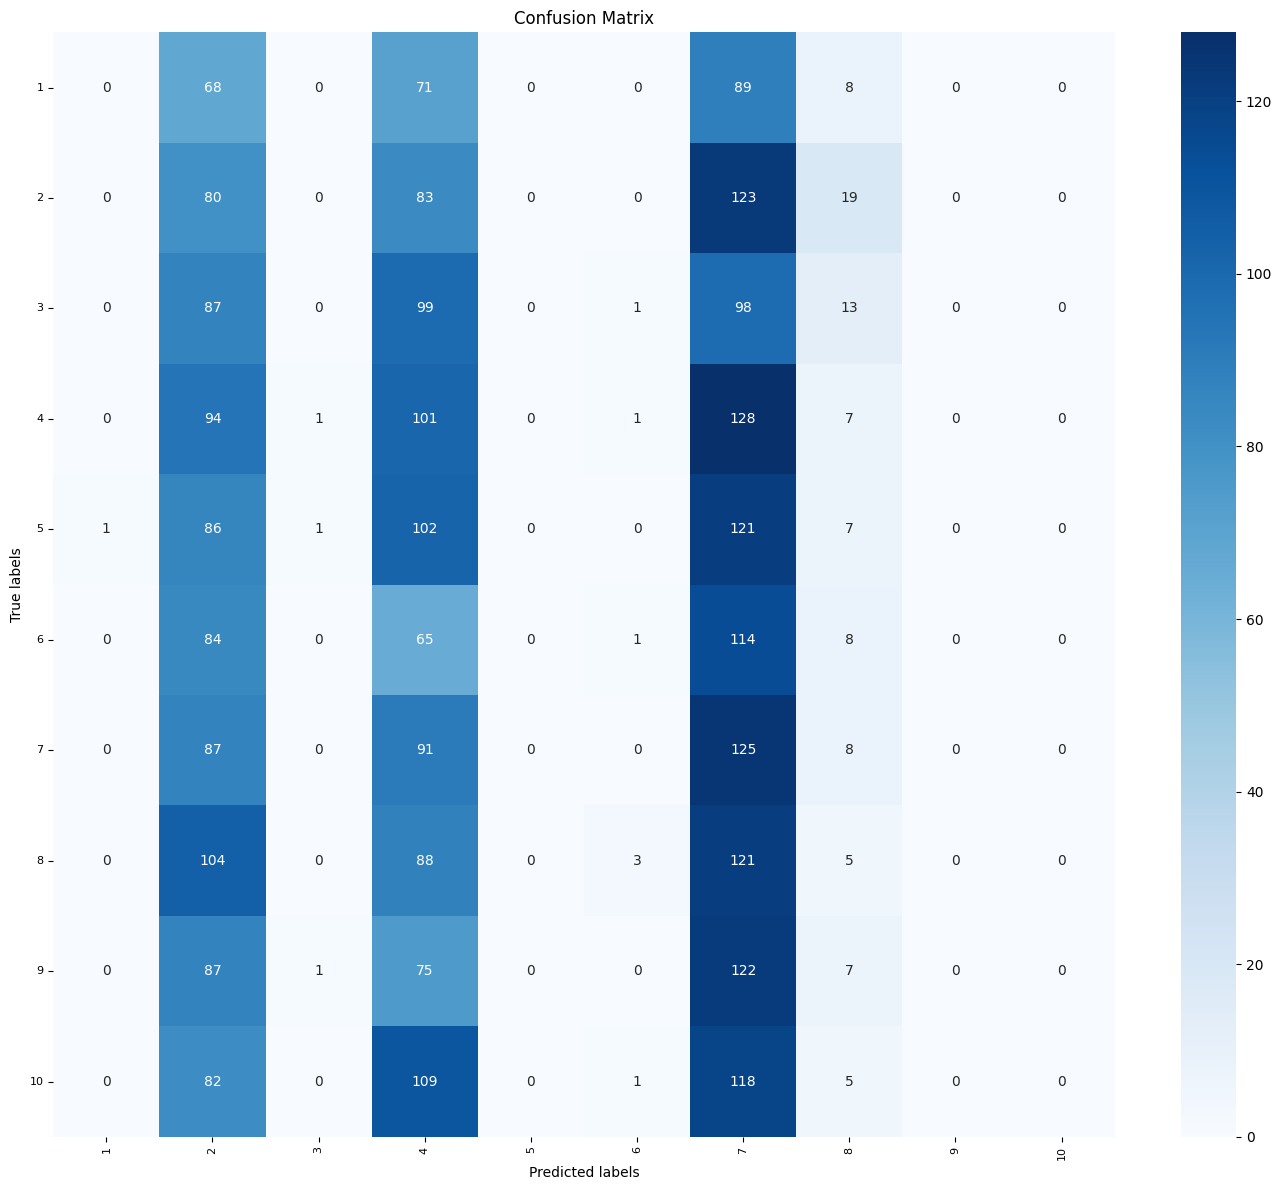

In [ ]:
rf_scaled_ = RandomForestClassifier(random_state=42)
rf_scaled_.fit(X_train_scaled_, y_train_scaled_)
print("Random Forest Performance:")
evaluate_model(rf_, X_test_scaled_, y_test_scaled_)

Gradient Boosting Performance:
Accuracy: 0.101, Precision: 0.09971155351541486, Recall: 0.0998774112396126, F1 Score: 0.09601362502582046

Classification Report:
               precision    recall  f1-score   support

           1       0.07      0.02      0.03       236
           2       0.07      0.06      0.06       305
           3       0.08      0.08      0.08       298
           4       0.10      0.14      0.12       332
           5       0.12      0.13      0.12       318
           6       0.09      0.18      0.12       272
           7       0.13      0.08      0.10       311
           8       0.10      0.09      0.09       321
           9       0.12      0.14      0.13       292
          10       0.12      0.10      0.10       315

    accuracy                           0.10      3000
   macro avg       0.10      0.10      0.10      3000
weighted avg       0.10      0.10      0.10      3000



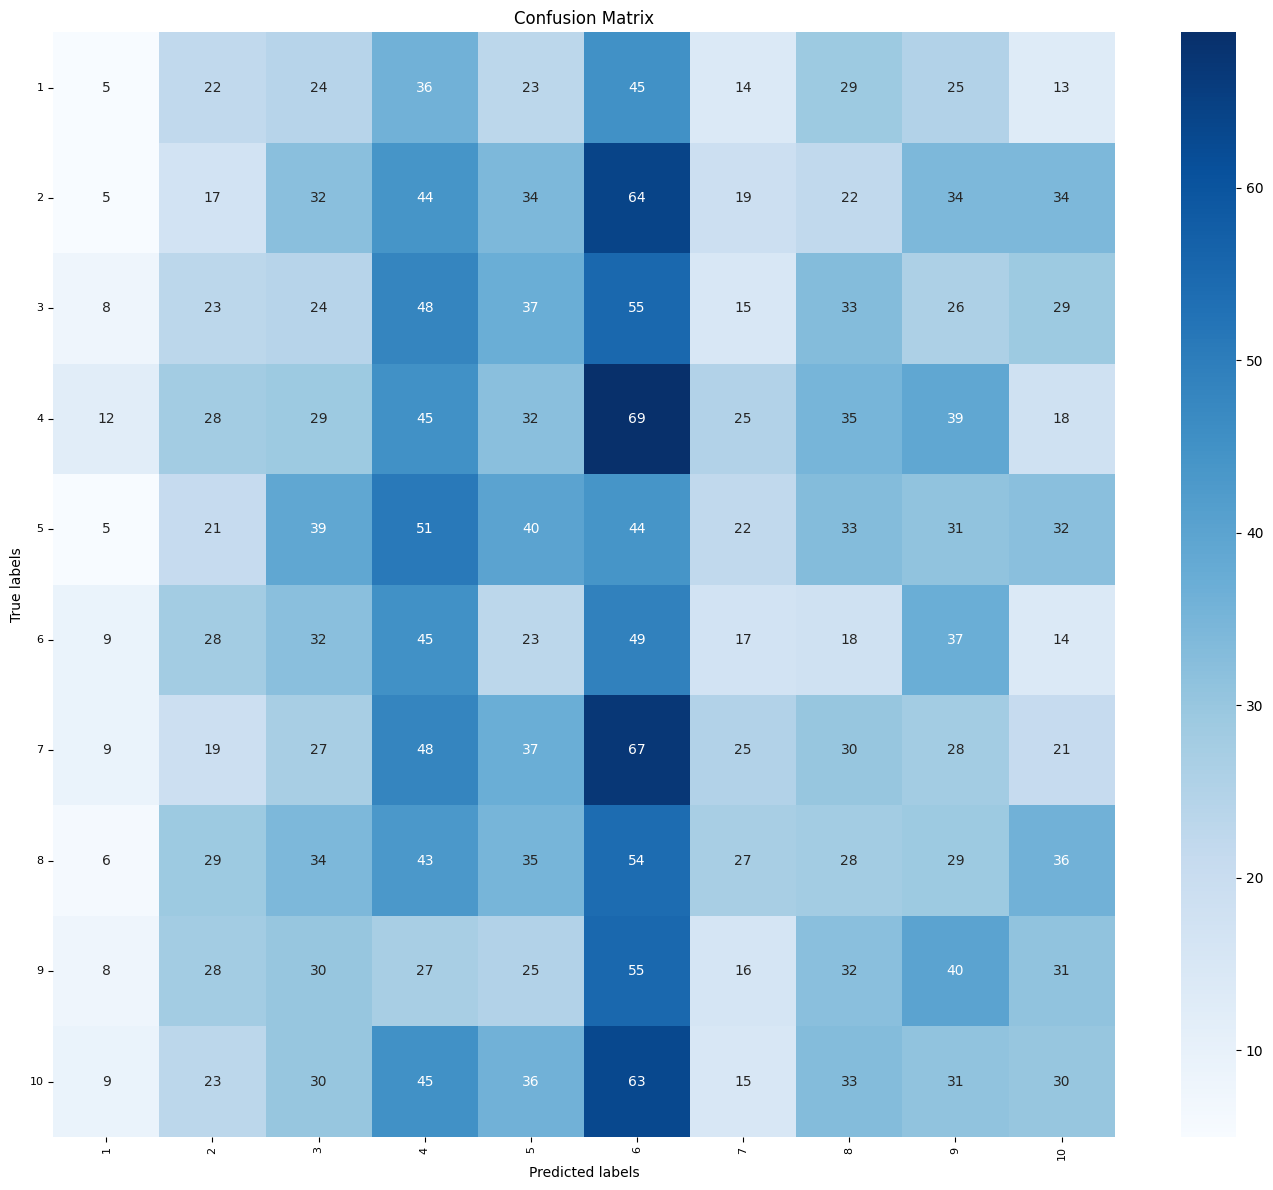

In [ ]:
gb_scaled_ = GradientBoostingClassifier(random_state=42)
gb_scaled_.fit(X_train_scaled_, y_train_scaled_)
print("Gradient Boosting Performance:")
evaluate_model(gb_scaled_, X_test_scaled_, y_test_scaled_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Performance:
Accuracy: 0.10533333333333333, Precision: 0.09772145493406208, Recall: 0.10282071364540975, F1 Score: 0.09774493753525584

Classification Report:
               precision    recall  f1-score   support

           1       0.03      0.01      0.01       236
           2       0.10      0.09      0.09       305
           3       0.09      0.10      0.10       298
           4       0.13      0.22      0.16       332
           5       0.12      0.10      0.11       318
           6       0.10      0.14      0.12       272
           7       0.10      0.07      0.08       311
           8       0.09      0.08      0.09       321
           9       0.12      0.12      0.12       292
          10       0.10      0.10      0.10       315

    accuracy                           0.11      3000
   macro avg       0.10      0.10      0.10      3000
weighted avg       0.10      0.11      0.10      3000



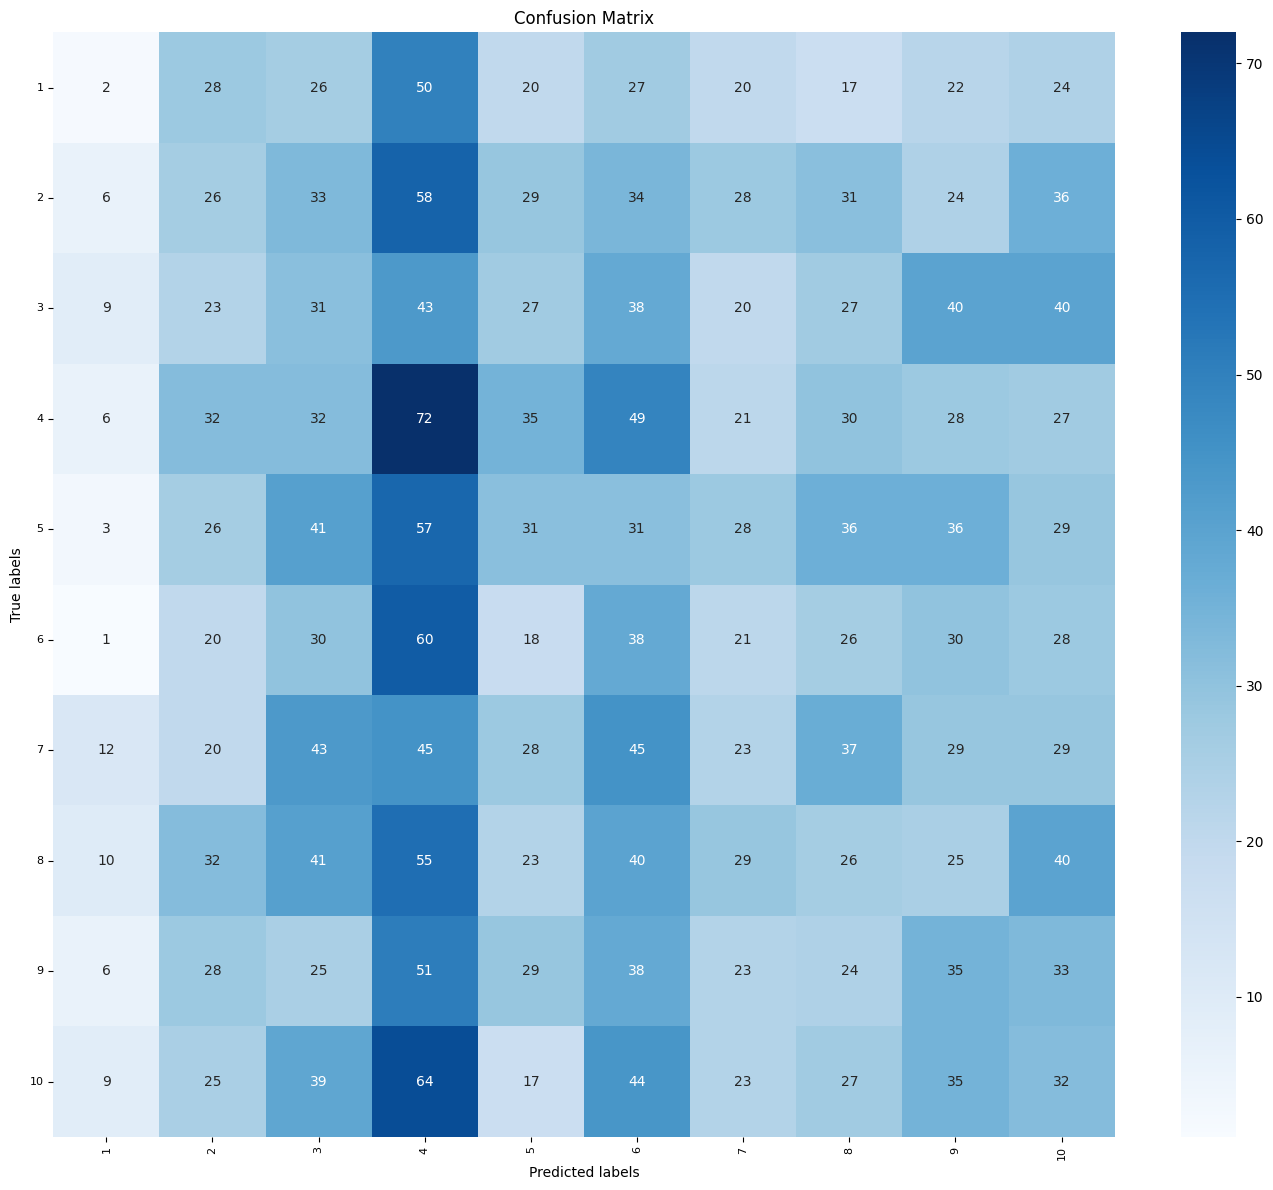

In [ ]:
nn_scaled_ = MLPClassifier(random_state=42)
nn_scaled_.fit(X_train_scaled_, y_train_scaled_)
print("Neural Network Performance:")
evaluate_model(nn_scaled_, X_test_scaled_, y_test_scaled_)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr_scaled_ = LinearRegression()
lr_scaled_.fit(X_train_scaled_, y_train_scaled_)

# Predict on the test set
y_pred = lr_scaled_.predict(X_test_scaled_)

mae = mean_absolute_error(y_test_scaled_, y_pred)
rmse = mean_squared_error(y_test_scaled_, y_pred, squared=False)
r2 = r2_score(y_test_scaled_, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 2.4584415286026133
Root Mean Squared Error: 2.8257482095709845
R-squared: -0.0022264507701472702


**With SMOTE**

In [ ]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_, y_)
X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)

In [ ]:
rf_smote = RandomForestClassifier(random_state=42)
gb_smote = GradientBoostingClassifier(random_state=42)
nn_smote = MLPClassifier(random_state=42)

rf_smote.fit(X_train_smote, y_train_smote)
gb_smote.fit(X_train_smote, y_train_smote)
nn_smote.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

Random Forest Performance:
Accuracy: 0.16621170761298149, Precision: 0.16578322284363778, Recall: 0.16648375227040463, F1 Score: 0.16596761137182964

Classification Report:
               precision    recall  f1-score   support

           1       0.31      0.33      0.32       329
           2       0.17      0.15      0.16       343
           3       0.13      0.15      0.14       319
           4       0.10      0.10      0.10       344
           5       0.17      0.17      0.17       336
           6       0.12      0.12      0.12       329
           7       0.17      0.16      0.16       321
           8       0.17      0.16      0.17       337
           9       0.18      0.19      0.18       319
          10       0.14      0.13      0.13       320

    accuracy                           0.17      3297
   macro avg       0.17      0.17      0.17      3297
weighted avg       0.17      0.17      0.17      3297



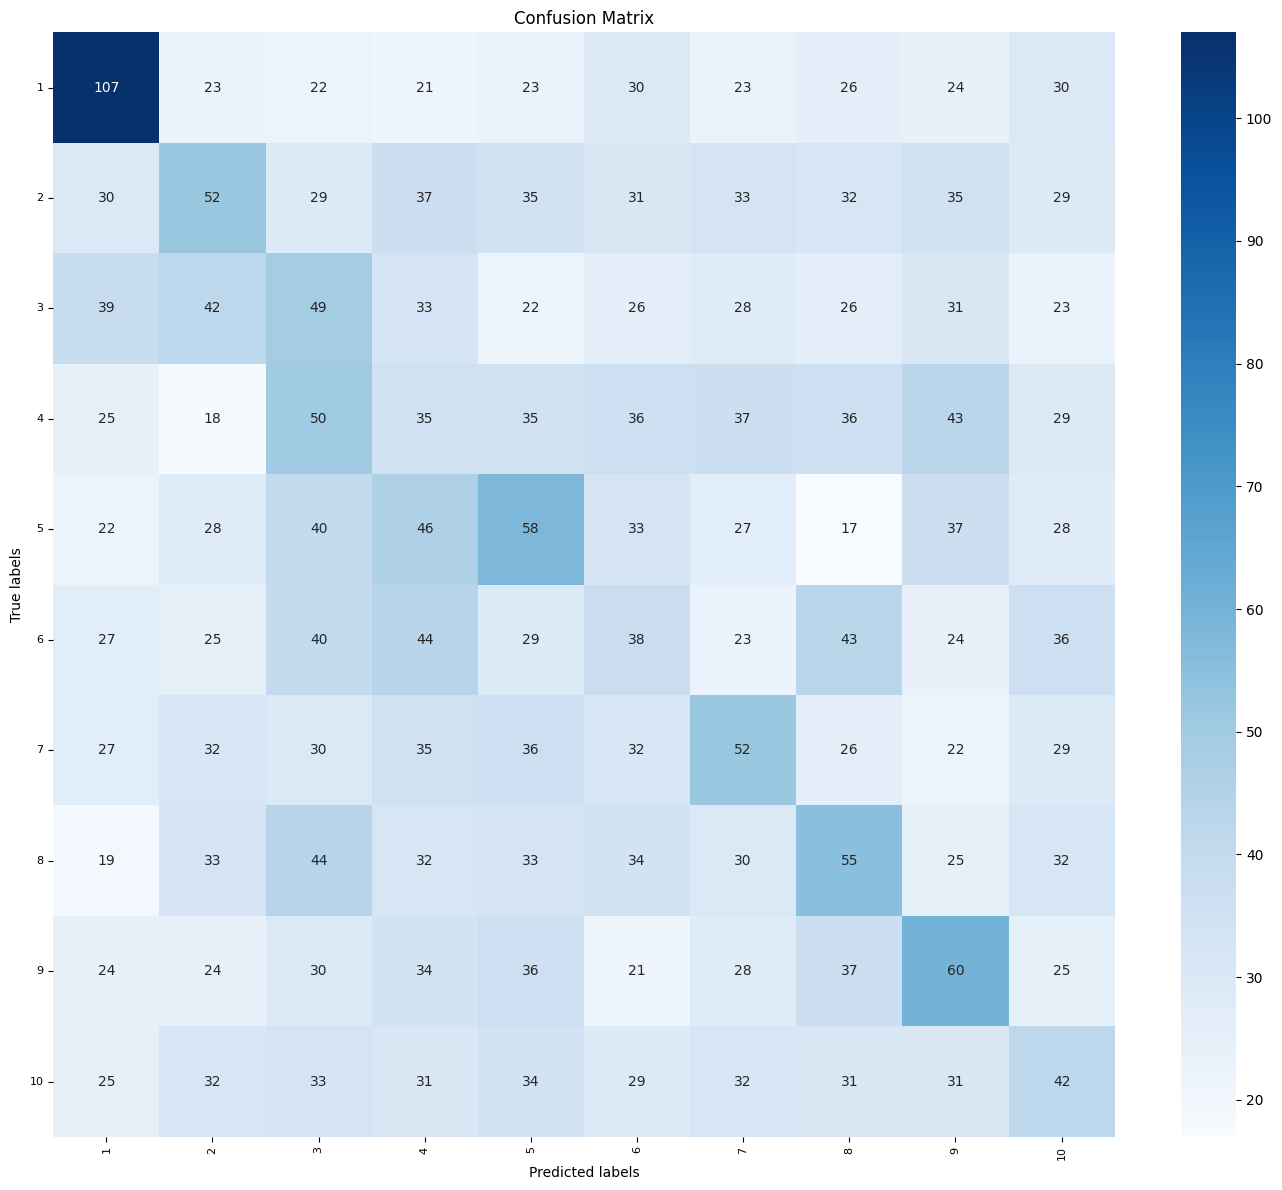

Gradient Boosting Performance:
Accuracy: 0.11737943585077343, Precision: 0.11848326673915437, Recall: 0.11763059826229143, F1 Score: 0.11698723208994004

Classification Report:
               precision    recall  f1-score   support

           1       0.19      0.16      0.18       329
           2       0.10      0.08      0.09       343
           3       0.13      0.14      0.13       319
           4       0.12      0.14      0.13       344
           5       0.10      0.11      0.11       336
           6       0.10      0.13      0.11       329
           7       0.09      0.07      0.08       321
           8       0.09      0.08      0.09       337
           9       0.11      0.14      0.12       319
          10       0.15      0.14      0.14       320

    accuracy                           0.12      3297
   macro avg       0.12      0.12      0.12      3297
weighted avg       0.12      0.12      0.12      3297



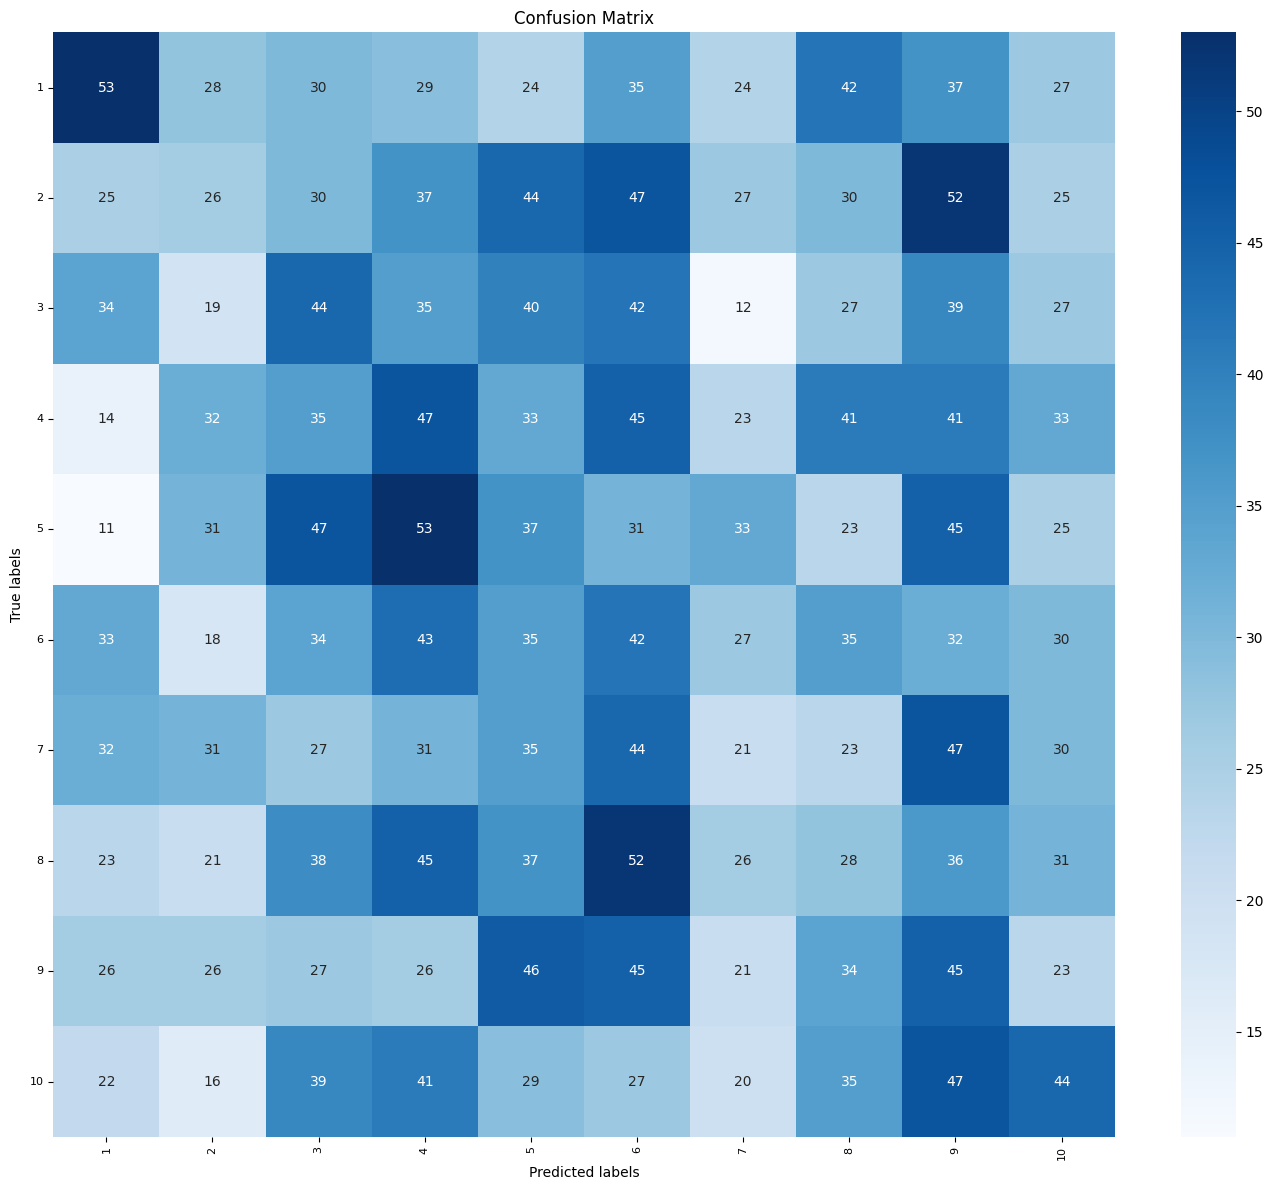

Neural Network Performance:
Accuracy: 0.11859265999393388, Precision: 0.11648461440672271, Recall: 0.11891042766308893, F1 Score: 0.1162415034493663

Classification Report:
               precision    recall  f1-score   support

           1       0.12      0.13      0.13       329
           2       0.15      0.18      0.16       343
           3       0.12      0.11      0.11       319
           4       0.10      0.07      0.08       344
           5       0.11      0.09      0.10       336
           6       0.12      0.09      0.10       329
           7       0.12      0.16      0.14       321
           8       0.10      0.08      0.09       337
           9       0.12      0.18      0.15       319
          10       0.10      0.10      0.10       320

    accuracy                           0.12      3297
   macro avg       0.12      0.12      0.12      3297
weighted avg       0.12      0.12      0.12      3297



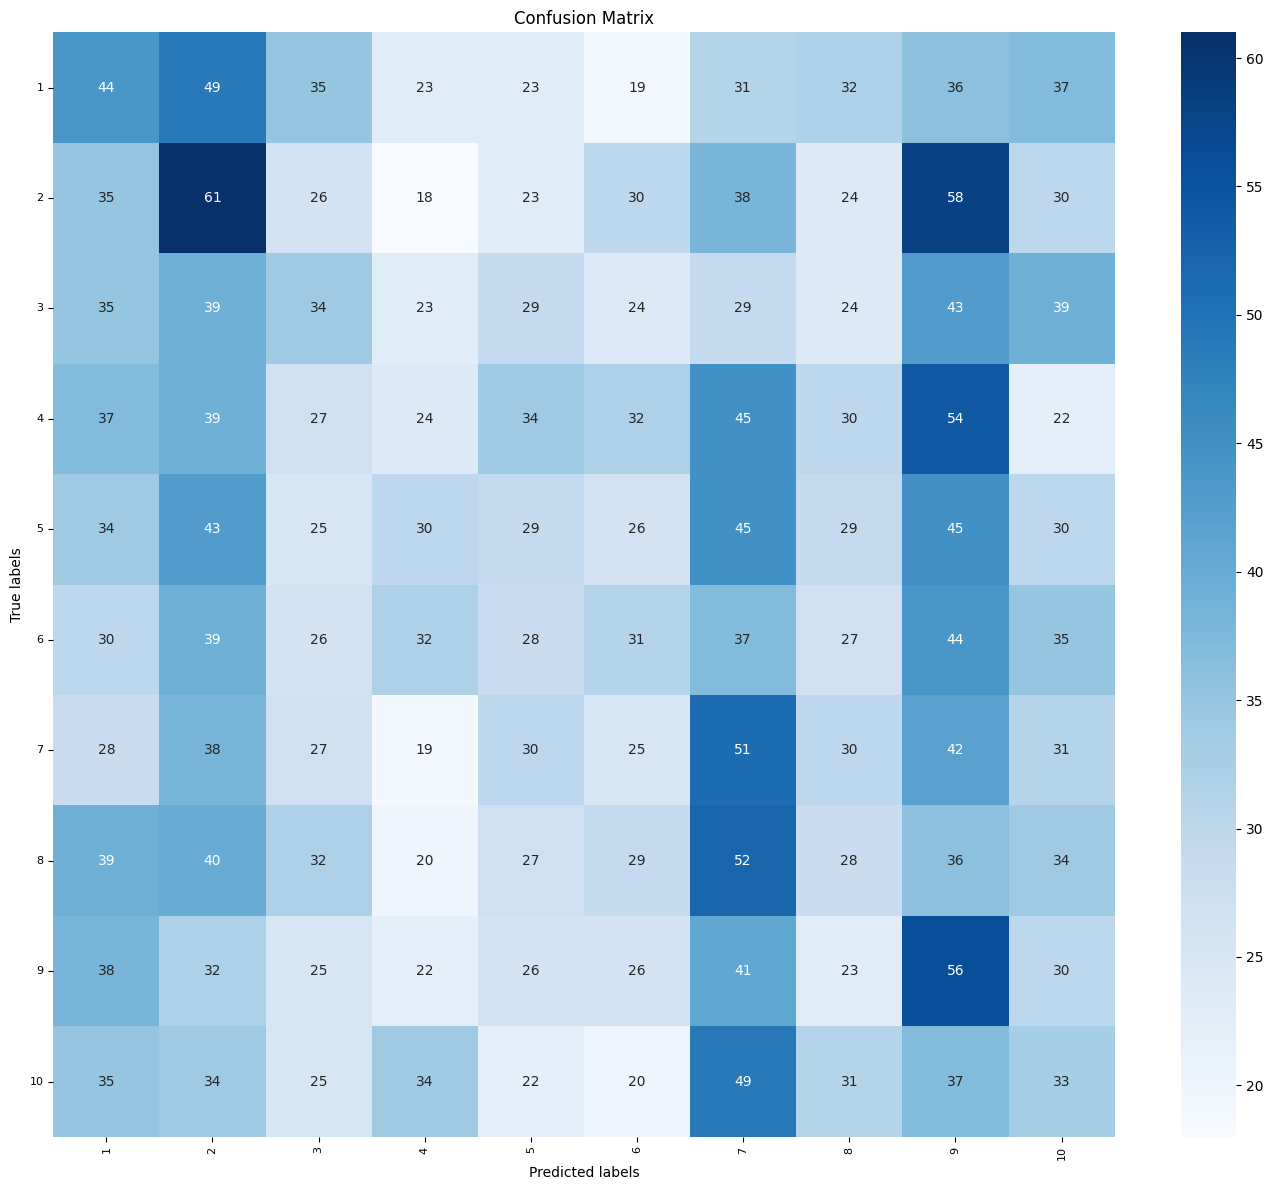

In [ ]:
print("Random Forest Performance:")
evaluate_model(rf_smote, X_test_smote, y_test_smote)

print("Gradient Boosting Performance:")
evaluate_model(gb_smote, X_test_smote, y_test_smote)

print("Neural Network Performance:")
evaluate_model(nn_smote, X_test_smote, y_test_smote)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_smote, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


Accuracy: 0.1710646041856233, Precision: 0.17188895636402018, Recall: 0.1713550298323369, F1 Score: 0.17143969395794242

Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.33      0.33       329
           2       0.18      0.15      0.16       343
           3       0.13      0.15      0.14       319
           4       0.11      0.11      0.11       344
           5       0.18      0.17      0.17       336
           6       0.14      0.13      0.13       329
           7       0.17      0.17      0.17       321
           8       0.17      0.16      0.16       337
           9       0.17      0.18      0.17       319
          10       0.15      0.15      0.15       320

    accuracy                           0.17      3297
   macro avg       0.17      0.17      0.17      3297
weighted avg       0.17      0.17      0.17      3297



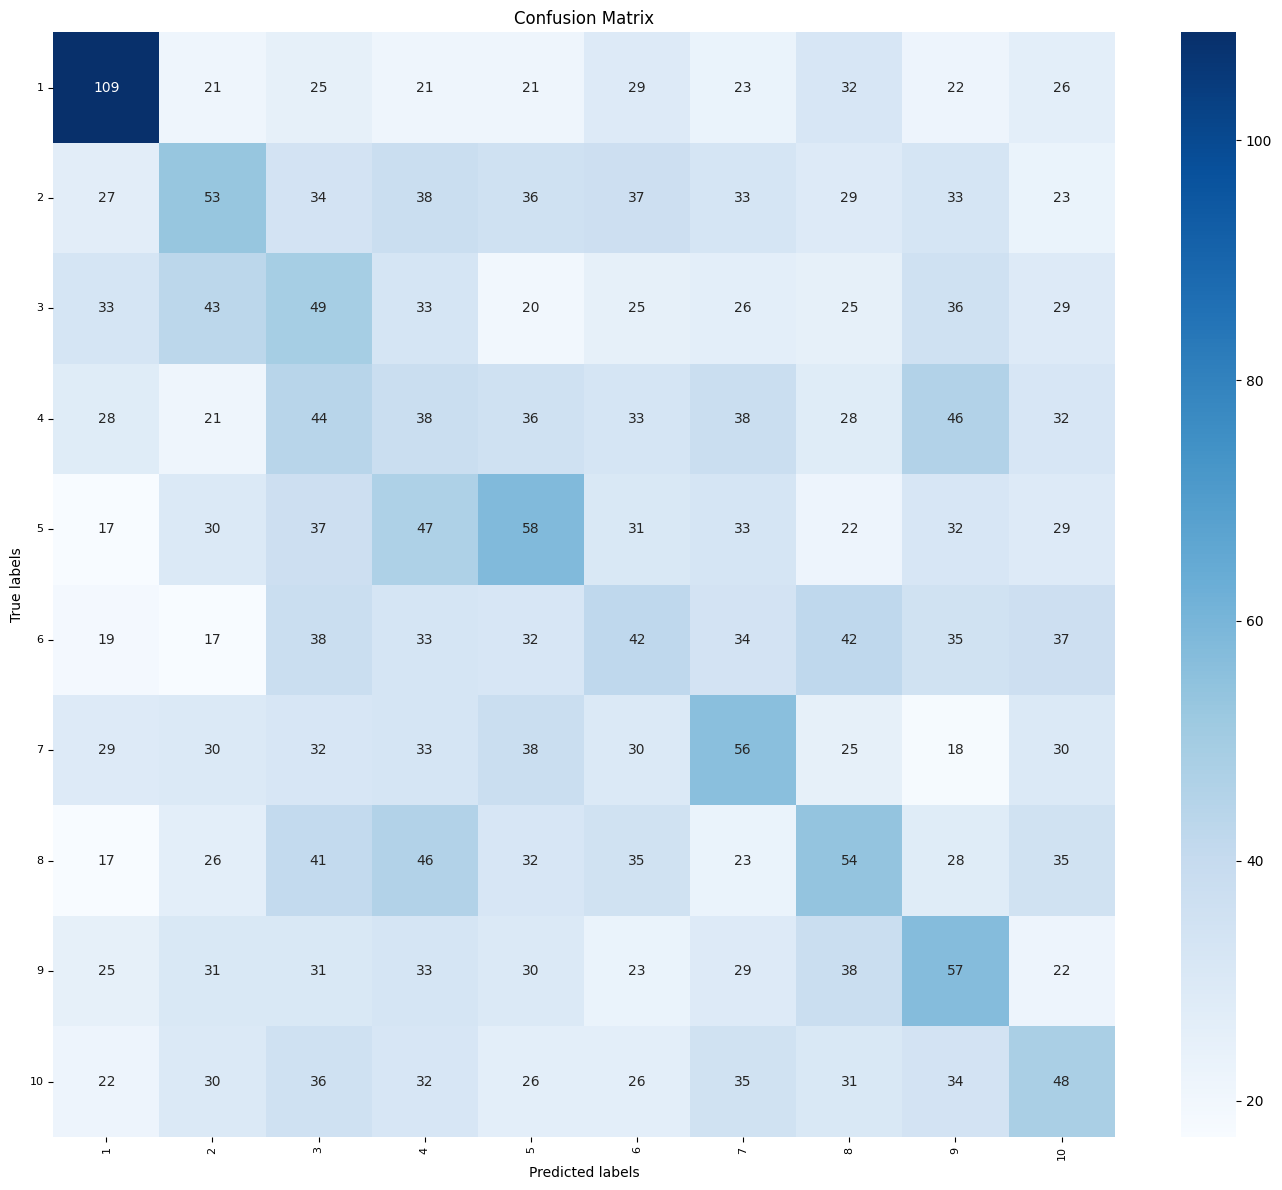

In [ ]:
rf_smote = RandomForestClassifier(**grid_search.best_params_,random_state=42)
rf_smote = rf_smote.fit(X_train_smote, y_train_smote)
evaluate_model(rf_smote, X_test_smote, y_test_smote)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr_scaled_smote = LinearRegression()
lr_scaled_smote.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = lr_scaled_smote.predict(X_test_smote)

mae = mean_absolute_error(y_test_smote, y_pred)
rmse = mean_squared_error(y_test_smote, y_pred, squared=False)
r2 = r2_score(y_test_smote, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
